# Credit_EDA_Assignment

## Should you get the loan? Will you pay the loan on time?

#### Problem Statement:

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile.
Risks associated with the bank’s decision:
    -Not approving loan to applicant who can repay the amount.
    -Approving loan to applicant who can't repay or likely to default.
Both result in loss of business to the company. So, The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter.

The data given in 'applicant_data' file contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:
  -  The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,
  - All other cases: All other cases when the payment is paid on time.

The data given in 'previous_application' contains information about the client’s previous loan data. When a client applies for a loan, there are four types of decisions that could be taken by the client/company):
- `Approved`: The Company has approved loan Application
- `Cancelled`: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.
- `Refused`: The company had rejected the loan (because the client does not meet their requirements etc.).
- `Unused offer`:  Loan has been cancelled by the client but on different stages of the process.



#### Objective: 

To identify patterns which indicate if a client has difficulty paying their installments (i.e., company wants to understand the driving factors/variables or strong indicators behind loan default)
Based on the trend analysis/ result, company can: Deny loan, Reduce amount of loan or lend loan at high interest to risky applicant. Also, applicants who are capable of repaying the loan are not rejected.

In this case study, will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

#### Importing the libraries.

In [1]:
#import the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the useful libraries.
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

### Data Sourcing

In [3]:
#read the data set of "application_data.csv" in New_Applicant.
New_Applicant = pd.read_csv("application_data.csv")

#Print the head of New_Applicant(First 5 rows)
New_Applicant.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Print the tail of New_Applicant (last 5 colums)

New_Applicant.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


### Data Cleaning

In [5]:
#print the information of variables to check their data types.
New_Applicant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


#### Data quality check

In [6]:
#Checking missing values % columns

Missing_value1 = (New_Applicant.isnull().sum()/len(New_Applicant))*100
Missing_value1.sort_values(ascending=False).head(50)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

#### Handling Missing value columns

In [7]:
#Dropping the coulmns having more than 40% of data missing; as it doesn't have sufficent data for analysis.

Missing_Cols= New_Applicant.columns[New_Applicant.isnull().mean()>0.4]

New_Applicant.drop(Missing_Cols, axis=1, inplace=True)

In [8]:
New_Applicant.shape

(307511, 73)

In [9]:
#Checking missing values % columns

Missing_value2 = (New_Applicant.isnull().sum()/len(New_Applicant))*100
Missing_value2.sort_values(ascending=False).head(20)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
dtype: float64

##### Impute Missing values: 

In [10]:
#OCCUPATION_TYPE column in New_Applicant has 31% missing values.
New_Applicant.OCCUPATION_TYPE.dtype

dtype('O')

In [11]:
#OCCUPATION_TYPE column is a Categorial col. Can impute missing values through mode?.
New_Applicant.OCCUPATION_TYPE.mode()

0    Laborers
dtype: object

In [12]:
#Checking for unqiue type
New_Applicant.OCCUPATION_TYPE.unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [13]:
#Checking for percentage distribution of values for each category.
New_Applicant.OCCUPATION_TYPE.value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

In [14]:
New_Applicant.OCCUPATION_TYPE.fillna("Missing", inplace=True)

In [15]:
New_Applicant.OCCUPATION_TYPE.isnull().sum()

0

Occupation type has multiple catergories and distribution mode has Laborers. But can't replace 31% missing data with laborer as this would impact the analysis. Hence, missing values are retained as is and named it  as 'Missing'.

Similarly , will check for other columns with missing values.

In [16]:
New_Applicant.AMT_REQ_CREDIT_BUREAU_QRT.value_counts(normalize=True)*100

0.0      80.986270
1.0      12.730458
2.0       5.418208
3.0       0.645508
4.0       0.178953
5.0       0.024061
6.0       0.010527
8.0       0.002632
7.0       0.002632
19.0      0.000376
261.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [17]:
#For AMT_REQ_CREDIT_BUREAU_QRT, Maximum distribution of data is seen at one value.
#Hence,dropping the rows with missing value here as this missing data will not have major impact to column (the column already has constant/max value for analysis).

New_Applicant = New_Applicant[~New_Applicant.AMT_REQ_CREDIT_BUREAU_QRT.isnull()] #dropping null rows from 'AMT_REQ_CREDIT_BUREAU_QRT' column

New_Applicant.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

0

In [18]:
Missing_value3 = (New_Applicant.isnull().sum()/len(New_Applicant))*100 #rechecking missing value %

Missing_value3.sort_values(ascending=False).head(10)

EXT_SOURCE_3                7.310746
NAME_TYPE_SUITE             0.444750
OBS_30_CNT_SOCIAL_CIRCLE    0.319934
DEF_30_CNT_SOCIAL_CIRCLE    0.319934
OBS_60_CNT_SOCIAL_CIRCLE    0.319934
DEF_60_CNT_SOCIAL_CIRCLE    0.319934
EXT_SOURCE_2                0.198502
AMT_GOODS_PRICE             0.087221
AMT_ANNUITY                 0.004135
CNT_FAM_MEMBERS             0.000376
dtype: float64

In [19]:
New_Applicant.NAME_TYPE_SUITE.unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [20]:
New_Applicant.NAME_TYPE_SUITE.value_counts(normalize=True)*100

Unaccompanied      81.410375
Family             12.999558
Spouse, partner     3.632429
Children            1.049813
Other_B             0.554362
Other_A             0.268118
Group of people     0.085345
Name: NAME_TYPE_SUITE, dtype: float64

In [21]:
#Here also for NAME_TYPE_SUITE, Maximum distribution of data is seen at one value.
#Hence,dropping the rows with missing value.

New_Applicant = New_Applicant[~New_Applicant.NAME_TYPE_SUITE.isnull()]

In [22]:
Missing_value4 = (New_Applicant.isnull().sum()/len(New_Applicant))*100
Missing_value4.sort_values(ascending=False).head(10)

EXT_SOURCE_3                7.303755
OBS_30_CNT_SOCIAL_CIRCLE    0.321364
DEF_30_CNT_SOCIAL_CIRCLE    0.321364
OBS_60_CNT_SOCIAL_CIRCLE    0.321364
DEF_60_CNT_SOCIAL_CIRCLE    0.321364
EXT_SOURCE_2                0.199389
AMT_ANNUITY                 0.004154
FLAG_DOCUMENT_4             0.000000
FLAG_DOCUMENT_8             0.000000
FLAG_DOCUMENT_7             0.000000
dtype: float64

In [23]:
#AMT_ANNUITY has very less % of null value. Checking if we can impute the data

New_Applicant.AMT_ANNUITY.dtype

dtype('float64')

In [24]:
New_Applicant.AMT_ANNUITY.describe()

count    264798.000000
mean      27187.020291
std       14385.528237
min        1615.500000
25%       16636.500000
50%       24997.500000
75%       34749.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [25]:
#Looks like there are outliers in the data, as the difference between max value and 75% values is huge. 
#So, will impute the missing value with Median.

New_Applicant.loc[New_Applicant.AMT_ANNUITY.isnull(), "AMT_ANNUITY"]= New_Applicant.AMT_ANNUITY.median()

New_Applicant.AMT_ANNUITY.isnull().sum()

0

In [26]:
New_Applicant.AMT_ANNUITY.describe()

count    264809.000000
mean      27186.929340
std       14385.236372
min        1615.500000
25%       16641.000000
50%       24997.500000
75%       34749.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [27]:
Missing_value5 = (New_Applicant.isnull().sum()/len(New_Applicant))*100
Missing_value5.sort_values(ascending=False).head(5)

EXT_SOURCE_3                7.303755
OBS_30_CNT_SOCIAL_CIRCLE    0.321364
DEF_30_CNT_SOCIAL_CIRCLE    0.321364
OBS_60_CNT_SOCIAL_CIRCLE    0.321364
DEF_60_CNT_SOCIAL_CIRCLE    0.321364
dtype: float64

In [28]:
#Dropping the rows for the Columns with 0.3% missing data: OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE
New_Applicant = New_Applicant[~New_Applicant.OBS_30_CNT_SOCIAL_CIRCLE.isnull()]
New_Applicant = New_Applicant[~New_Applicant.DEF_30_CNT_SOCIAL_CIRCLE.isnull()]
New_Applicant = New_Applicant[~New_Applicant.OBS_60_CNT_SOCIAL_CIRCLE.isnull()]
New_Applicant = New_Applicant[~New_Applicant.DEF_60_CNT_SOCIAL_CIRCLE.isnull()]

In [29]:
New_Applicant.shape

(263958, 73)

In [30]:
New_Applicant.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [31]:
New_Applicant.FLAG_DOCUMENT_2.unique() #dropping similar columns that has no significant data to analyse

array([0], dtype=int64)

Dropping columns that has no significant data to analyze.

In [32]:
New_Applicant.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'], axis=1, inplace=True)

In [33]:
New_Applicant.shape

(263958, 51)

In [34]:
Missing_value6 = (New_Applicant.isnull().sum()/len(New_Applicant))*100
Missing_value6.sort_values(ascending=False).head()

SK_ID_CURR                     0.0
LIVE_CITY_NOT_WORK_CITY        0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
dtype: float64

Now, we have zero missing value columns for further cleaning

Checking data for each columns to identify errors in data and datatype.

In [35]:
New_Applicant.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_S

In [36]:
New_Applicant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263958 entries, 0 to 307510
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   263958 non-null  int64  
 1   TARGET                       263958 non-null  int64  
 2   NAME_CONTRACT_TYPE           263958 non-null  object 
 3   CODE_GENDER                  263958 non-null  object 
 4   FLAG_OWN_CAR                 263958 non-null  object 
 5   FLAG_OWN_REALTY              263958 non-null  object 
 6   CNT_CHILDREN                 263958 non-null  int64  
 7   AMT_INCOME_TOTAL             263958 non-null  float64
 8   AMT_CREDIT                   263958 non-null  float64
 9   AMT_ANNUITY                  263958 non-null  float64
 10  AMT_GOODS_PRICE              263958 non-null  float64
 11  NAME_TYPE_SUITE              263958 non-null  object 
 12  NAME_INCOME_TYPE             263958 non-null  object 
 13 

In [37]:
New_Applicant.CODE_GENDER.unique() #XNA may be not availabe data

array(['M', 'F', 'XNA'], dtype=object)

In [38]:
New_Applicant.CODE_GENDER.value_counts(normalize=True)*100 #Percentage Distribution of data indicate 'F' has max count

F      66.289334
M      33.709151
XNA     0.001515
Name: CODE_GENDER, dtype: float64

In [39]:
#Replace 'XNA' value with mode as it's categorical data and will not impact the analysis
New_Applicant.loc[New_Applicant["CODE_GENDER"] =='XNA', "CODE_GENDER"]= "F"
New_Applicant.CODE_GENDER.value_counts()

F    174980
M     88978
Name: CODE_GENDER, dtype: int64

In [40]:
print(New_Applicant.DAYS_BIRTH.unique()) #values are in negatives number of days. 

#Checking for such data in all columns prefixed DAYS_

print(New_Applicant.DAYS_EMPLOYED.unique()) 
print(New_Applicant.DAYS_REGISTRATION.unique())
print(New_Applicant.DAYS_ID_PUBLISH.unique())
print(New_Applicant.DAYS_LAST_PHONE_CHANGE.unique())

[ -9461 -16765 -19046 ...  -7857 -25061 -24918]
[  -637  -1188   -225 ... -11084  -7499  -8694]
[ -3648.  -1186.  -4260. ... -16396. -15953. -14558.]
[-2120  -291 -2531 ... -5906 -5854 -6211]
[-1134.  -828.  -815. ... -3899. -3559. -3538.]


In [41]:
#Converting the negative values to positive through abs function.

New_Applicant.DAYS_BIRTH = abs(New_Applicant.DAYS_BIRTH)
New_Applicant.DAYS_EMPLOYED = abs(New_Applicant.DAYS_EMPLOYED)
New_Applicant.DAYS_REGISTRATION = abs(New_Applicant.DAYS_REGISTRATION)
New_Applicant.DAYS_ID_PUBLISH = abs(New_Applicant.DAYS_ID_PUBLISH)
New_Applicant.DAYS_LAST_PHONE_CHANGE = abs(New_Applicant.DAYS_LAST_PHONE_CHANGE)

In [42]:
print(New_Applicant.DAYS_BIRTH.unique()) #values are in negatives number of days. 
print(New_Applicant.DAYS_EMPLOYED.unique()) 
print(New_Applicant.DAYS_REGISTRATION.unique())
print(New_Applicant.DAYS_ID_PUBLISH.unique())
print(New_Applicant.DAYS_LAST_PHONE_CHANGE.unique())

[ 9461 16765 19046 ...  7857 25061 24918]
[  637  1188   225 ... 11084  7499  8694]
[ 3648.  1186.  4260. ... 16396. 15953. 14558.]
[2120  291 2531 ... 5906 5854 6211]
[1134.  828.  815. ... 3899. 3559. 3538.]


In [43]:
#Converting DAYS_BIRTH to years (age)

New_Applicant.DAYS_BIRTH = round(New_Applicant.DAYS_BIRTH/365,0).astype(int) 

#absolute value/365 days gives data in float which is rounded to 0 digits which is still gives float (not the type we need for age data). So, datatype is converted to int

In [44]:
New_Applicant.DAYS_BIRTH.unique() ##values indicate age of applicant now

array([26, 46, 52, 55, 38, 28, 56, 37, 39, 24, 35, 49, 31, 41, 68, 53, 51,
       44, 27, 42, 36, 32, 33, 47, 58, 66, 48, 65, 54, 34, 29, 59, 50, 22,
       63, 40, 30, 45, 25, 60, 43, 57, 69, 61, 64, 23, 62, 21, 67])

In [45]:
print(New_Applicant.CNT_FAM_MEMBERS.unique()) 

#Number of Family members data is in float---> not logical dtype for this data.
#converting dtype from float to int

New_Applicant.CNT_FAM_MEMBERS = New_Applicant.CNT_FAM_MEMBERS.astype(int)

[ 1.  2.  3.  4.  5.  6.  9.  7.  8. 10. 13. 14. 12. 20. 15. 16. 11.]


In [46]:
New_Applicant.CNT_FAM_MEMBERS.unique()

array([ 1,  2,  3,  4,  5,  6,  9,  7,  8, 10, 13, 14, 12, 20, 15, 16, 11])

In [47]:
New_Applicant.ORGANIZATION_TYPE.unique() ##XNA may be not availabe data

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Medicine', 'Business Entity Type 2',
       'Self-employed', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Transport: type 4',
       'Industry: type 1', 'Emergency', 'Security', 'Trade: type 2',
       'University', 'Police', 'Construction', 'Business Entity Type 1',
       'Postal', 'Industry: type 4', 'Agriculture', 'Restaurant',
       'Transport: type 2', 'Culture', 'Hotel', 'Industry: type 7',
       'Trade: type 3', 'Industry: type 3', 'Bank', 'Industry: type 9',
       'Trade: type 6', 'Industry: type 2', 'Transport: type 1',
       'Transport: type 3', 'Electricity', 'Industry: type 12',
       'Insurance', 'Security Ministries', 'Mobile', 'Trade: type 1',
       'Industry: type 5', 'Industry: type 10', 'Legal Services',
       'Advertising', 'Trade: type 5', 'Cleaning', 'Industry: type 13',
       'Industry: type 8', 'Realtor', 'Telec

In [48]:
New_Applicant.ORGANIZATION_TYPE.value_counts(normalize=True)*100 #Percentage distribution of data is across and has mode as 'Business Entity Type 3'. 

Business Entity Type 3    21.930762
XNA                       17.957402
Self-employed             12.008350
Other                      5.445184
Medicine                   3.788860
Business Entity Type 2     3.556248
Government                 3.485403
School                     3.008812
Trade: type 7              2.459861
Kindergarten               2.316656
Construction               2.145796
Business Entity Type 1     1.979482
Transport: type 4          1.764675
Industry: type 9           1.147910
Trade: type 3              1.120254
Industry: type 3           1.074413
Security                   1.056607
Housing                    0.975913
Industry: type 11          0.888399
Military                   0.888020
Bank                       0.841801
Police                     0.808462
Transport: type 2          0.769819
Agriculture                0.760348
Postal                     0.693292
Security Ministries        0.686094
Trade: type 2              0.581532
Restaurant                 0

In [49]:
#Replacing XNA data with mode 'Business Entity Type 3' will impact the analysis as data is distributed across 58 unique categories.

New_Applicant.ORGANIZATION_TYPE.describe()

count                     263958
unique                        58
top       Business Entity Type 3
freq                       57888
Name: ORGANIZATION_TYPE, dtype: object

In [50]:
#XNA contribute 17.95% of the data in ORGANIZATION_TYPE. If we drop these rows, it won't have major impact on our dataset.

New_Applicant= New_Applicant[~(New_Applicant["ORGANIZATION_TYPE"] == "XNA")]

New_Applicant.ORGANIZATION_TYPE.unique() #XNA related rows are no longer peresent in the dataset

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'Medicine', 'Business Entity Type 2', 'Self-employed',
       'Housing', 'Kindergarten', 'Trade: type 7', 'Industry: type 11',
       'Military', 'Services', 'Transport: type 4', 'Industry: type 1',
       'Emergency', 'Security', 'Trade: type 2', 'University', 'Police',
       'Construction', 'Business Entity Type 1', 'Postal',
       'Industry: type 4', 'Agriculture', 'Restaurant',
       'Transport: type 2', 'Culture', 'Hotel', 'Industry: type 7',
       'Trade: type 3', 'Industry: type 3', 'Bank', 'Industry: type 9',
       'Trade: type 6', 'Industry: type 2', 'Transport: type 1',
       'Transport: type 3', 'Electricity', 'Industry: type 12',
       'Insurance', 'Security Ministries', 'Mobile', 'Trade: type 1',
       'Industry: type 5', 'Industry: type 10', 'Legal Services',
       'Advertising', 'Trade: type 5', 'Cleaning', 'Industry: type 13',
       'Industry: type 8', 'Realtor', 'Telecom', 'I

In [51]:
New_Applicant.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,216558.000000,216558.000000,216558.000000,2.165580e+05,2.165580e+05,216558.000000,2.165580e+05,216558.000000,216558.000000,216558.000000,...,216558.000000,216558.000000,216558.000000,216558.000000,216558.000000,216558.000000,216558.000000,216558.000000,216558.000000,216558.000000
mean,278012.611023,0.083123,0.505287,1.783552e+05,6.200863e+05,27928.634548,5.569410e+05,0.020861,40.739917,2450.818621,...,0.139602,1.406529,0.097073,997.653095,0.006571,0.006982,0.034194,0.282322,0.260226,1.861589
std,102892.880493,0.276069,0.766625,2.720489e+05,4.087271e+05,14528.402817,3.751531e+05,0.013778,9.921444,2375.297546,...,0.441656,2.398092,0.357371,833.360071,0.085028,0.110859,0.202974,0.947741,0.825205,1.826453
min,100002.000000,0.000000,0.000000,2.655000e+04,4.500000e+04,1980.000000,4.050000e+04,0.000290,21.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188723.500000,0.000000,0.000000,1.125000e+05,2.844000e+05,17208.000000,2.475000e+05,0.010006,33.000000,797.000000,...,0.000000,0.000000,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277805.500000,0.000000,0.000000,1.575000e+05,5.265000e+05,26019.000000,4.545000e+05,0.018850,40.000000,1705.000000,...,0.000000,0.000000,0.000000,806.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367245.250000,0.000000,1.000000,2.250000e+05,8.353800e+05,35694.000000,7.020000e+05,0.028663,48.000000,3270.000000,...,0.000000,2.000000,0.000000,1612.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,69.000000,17912.000000,...,34.000000,344.000000,24.000000,4185.000000,4.000000,9.000000,8.000000,27.000000,261.000000,23.000000


In [52]:
New_Applicant.shape

(216558, 51)

In [53]:
New_Applicant.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_S

#### Identify Numerical columns

In [54]:
Numerical_cols = New_Applicant.describe().columns
Numerical_cols

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_Y

#### Checking outliers in numeric columns:  

1. AMT_INCOME_TOTAL (Income of the client)

In [55]:
# describe the AMT_INCOME_TOTAL variable in New_Applicant

round(New_Applicant.AMT_INCOME_TOTAL.describe(), 0)

count       216558.0
mean        178355.0
std         272049.0
min          26550.0
25%         112500.0
50%         157500.0
75%         225000.0
max      117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

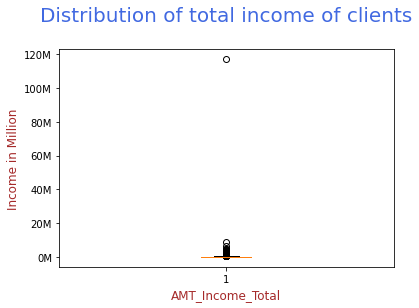

In [56]:
# plotting box plot (Not defining function here as I want to modify ticks values per data)
plt.boxplot(New_Applicant.AMT_INCOME_TOTAL)

# Adding and formatting title
plt.title("Distribution of total income of clients\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'RoyalBlue'})

# Labeling Axes
plt.xlabel("AMT_Income_Total", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Income in Million", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

# Modifying the ticks to show information in (millions) 
ticks = np.arange(0, 120000001, 20000000)
labels = ["{}M".format(i//1000000) for i in ticks]
plt.yticks(ticks, labels)

plt.show()

In the above boxplot of AMT_Income_Total, we can observe some outliers. Max income 117000000 (near to 120M) is surely an outlier here.

2. AMT_CREDIT (Credit amount of the loan)

In [57]:
round(New_Applicant.AMT_CREDIT.describe(),0)

count     216558.0
mean      620086.0
std       408727.0
min        45000.0
25%       284400.0
50%       526500.0
75%       835380.0
max      4050000.0
Name: AMT_CREDIT, dtype: float64

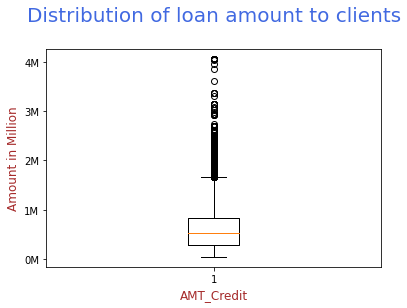

In [58]:
# plotting box plot
plt.boxplot(New_Applicant.AMT_CREDIT)

# Adding and formatting title
plt.title("Distribution of loan amount to clients\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'RoyalBlue'})

# Labeling Axes
plt.xlabel("AMT_Credit", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Amount in Million", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

# Modifying the ticks to show information in (millions)
ticks = np.arange(0, 5000000, 1000000)
labels = ["{}M".format(i//1000000) for i in ticks]
plt.yticks(ticks, labels)

plt.show()

In the above boxplot of AMT_Credit, we can observe some outliers. Considering the income of the applicant loan credit can vary and can't deem Max loan credited (4 Million) as outlier. 

3. AMT_ANNUITY (Loan annuity)

In [59]:
round(New_Applicant.AMT_ANNUITY.describe(),0)

count    216558.0
mean      27929.0
std       14528.0
min        1980.0
25%       17208.0
50%       26019.0
75%       35694.0
max      258026.0
Name: AMT_ANNUITY, dtype: float64

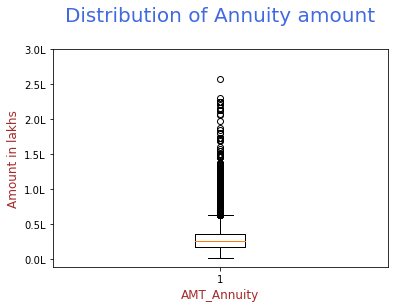

In [60]:
# plotting box plot
plt.boxplot(New_Applicant.AMT_ANNUITY)

# Adding and formatting title
plt.title("Distribution of Annuity amount\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'RoyalBlue'})

# Labeling Axes
plt.xlabel("AMT_Annuity", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Amount in lakhs", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

# Modifying the ticks to show information in (lakhs)
ticks = np.arange(0, 300001, 50000)
labels = ["{}L".format(i/100000) for i in ticks]
plt.yticks(ticks, labels)

plt.show()

In the above boxplot of AMT_Annuity, we can observe some outliers. Max loan annuity at 2.5L appears to be an outlier here.

4. DAYS_BIRTH (Client's age at the time of application---In years)

In [61]:
round(New_Applicant.DAYS_BIRTH.describe(),0)

count    216558.0
mean         41.0
std          10.0
min          21.0
25%          33.0
50%          40.0
75%          48.0
max          69.0
Name: DAYS_BIRTH, dtype: float64

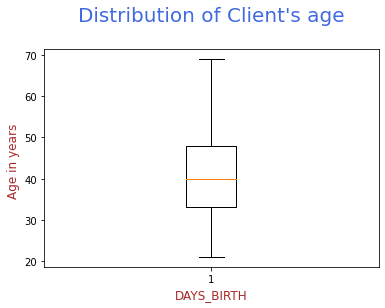

In [62]:
# plotting box plot
plt.boxplot(New_Applicant.DAYS_BIRTH)

# Adding and formatting title
plt.title("Distribution of Client's age\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'RoyalBlue'})

# Labeling Axes
plt.xlabel("DAYS_BIRTH", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Age in years ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

In the above boxplot of DAY_BIRTH, there are no outliers w.r.t age.

5. DAYS_EMPLOYED (How many days before the application the person started current employment)

In [63]:
round(New_Applicant.DAYS_EMPLOYED.describe(),0)

count    216558.0
mean       2451.0
std        2375.0
min           0.0
25%         797.0
50%        1705.0
75%        3270.0
max       17912.0
Name: DAYS_EMPLOYED, dtype: float64

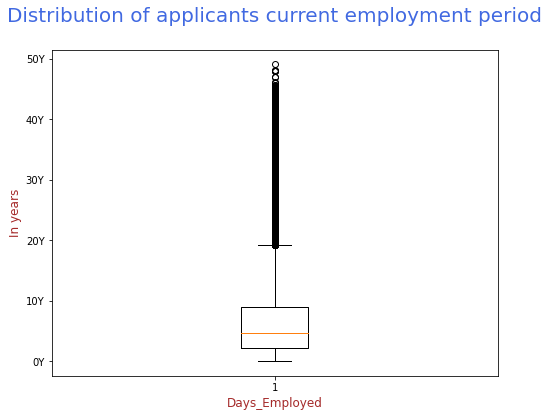

In [64]:
# plotting box plot
plt.figure(figsize=[8,6])
plt.boxplot(New_Applicant.DAYS_EMPLOYED)

# Adding and formatting title
plt.title("Distribution of applicants current employment period\n ", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'RoyalBlue'})

# Labeling Axes
plt.xlabel("Days_Employed", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("In years", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

# Modifying the ticks to show information in (year)
ticks = np.arange(0, 20000, 3650)
labels = ["{}Y".format(i//365) for i in ticks]
plt.yticks(ticks, labels)

plt.show()

In the above boxplot of DAYS_EMPLOYED, there is values near to 50 years is surely outlier. As per DAYS_BIRTH data, applicants Max age here is 69 years. Considering that, lets say applicant started working early in 21 years to which if we add the outlier values (ex: 21+49) that gives applicant age as 70-- serving in the same office where he/she started without retirement?!..

#### Binning of Continuous variables

Creating bins for columns AMT_INCOME_TOTAL, AMT_CREDIT and DAYS_BIRTH

In [65]:
#Binning 'AMT_INCOME_TOTAL' using Quantile-based discretization function: 
New_Applicant["AMT_INCOME_RANGE"] = pd.qcut(New_Applicant.AMT_INCOME_TOTAL, q=7, 
                                            labels=["Very Low","Low", "Below Normal", "Normal", "Above Normal", "High", "Very High"])
New_Applicant.AMT_INCOME_RANGE.head()

0    Above Normal
1            High
2        Very Low
4             Low
5             Low
Name: AMT_INCOME_RANGE, dtype: category
Categories (7, object): ['Very Low' < 'Low' < 'Below Normal' < 'Normal' < 'Above Normal' < 'High' < 'Very High']

In [66]:
New_Applicant.AMT_INCOME_RANGE.value_counts(normalize=True)*100 #percentage of distribution

Above Normal    16.366978
High            16.153178
Low             15.062477
Very Low        14.703682
Below Normal    13.877576
Normal          13.563572
Very High       10.272537
Name: AMT_INCOME_RANGE, dtype: float64

In [67]:
##Binning 'AMT_CREDIT_TOTAL' using Quantile-based discretization function:
New_Applicant["AMT_CREDIT_RANGE"] = pd.qcut(New_Applicant.AMT_CREDIT, q=5, 
                                            labels=["Low", "Below Normal", "Normal", "Above Normal", "High"])
New_Applicant.AMT_CREDIT_RANGE.head()

0    Below Normal
1            High
2             Low
4          Normal
5          Normal
Name: AMT_CREDIT_RANGE, dtype: category
Categories (5, object): ['Low' < 'Below Normal' < 'Normal' < 'Above Normal' < 'High']

In [68]:
New_Applicant.AMT_CREDIT_RANGE.value_counts(normalize=True)*100 #percentage distribution

Below Normal    22.098468
Low             20.008035
High            19.996952
Above Normal    19.759603
Normal          18.136943
Name: AMT_CREDIT_RANGE, dtype: float64

In [69]:
New_Applicant.DAYS_BIRTH.sort_values().unique() #age range lies with 21-70

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69])

In [70]:
#Binning DAYS_BIRTH/Age using Bin values into discrete intervals:
New_Applicant["DAYS_BIRTH_RANGE"] = pd.cut(New_Applicant.DAYS_BIRTH, bins=[18,25,36,56,70], 
                                           labels=["Young Adult", "Adult", "Middle age","Senior citizen"])
New_Applicant.DAYS_BIRTH_RANGE.head()

0         Adult
1    Middle age
2    Middle age
4    Middle age
5    Middle age
Name: DAYS_BIRTH_RANGE, dtype: category
Categories (4, object): ['Young Adult' < 'Adult' < 'Middle age' < 'Senior citizen']

In [71]:
New_Applicant.DAYS_BIRTH_RANGE.value_counts(normalize=True)*100 #percentage distribution

Middle age        56.957489
Adult             32.191838
Senior citizen     6.120300
Young Adult        4.730372
Name: DAYS_BIRTH_RANGE, dtype: float64

In [72]:
New_Applicant.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_S

### Analysis

In Target variable, finding Imbalance Percentage between 1(Defaulter) and 0 (Non-Defaulter)

In [73]:
#Dividing the New_Applicant dataset into 2 set based on values in Taget column: Target_1(Defaulter) and Target_0(Non-Defaulter)

Target_1 = New_Applicant[New_Applicant.TARGET==1] #Defaulter
Target_0 = New_Applicant[New_Applicant.TARGET==0] #Non-Defaulter

#Percentage of data distribution in New_Applicant dataset.
Target_1_Per= round((len(Target_1)/len(New_Applicant.TARGET))*100,2)
Target_0_Per= round((len(Target_0)/len(New_Applicant.TARGET))*100,2)

print("Defaulter % in New_Applicant dataset =", Target_1_Per,"%")
print("Non-Defaulter % in New_Applicant dataset =",Target_0_Per,"%" )

Defaulter % in New_Applicant dataset = 8.31 %
Non-Defaulter % in New_Applicant dataset = 91.69 %


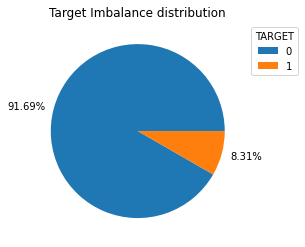

In [74]:
y=[Target_0_Per,Target_1_Per]
plt.pie(y, labels=["91.69%", "8.31%"])
plt.title("Target Imbalance distribution")
plt.legend(("0","1"),title="TARGET" ,bbox_to_anchor=(1,1))
plt.show()

Majority of data is seen in Target_0 (Non-Defaulter) dataset. Overall, 8.31% clients are defaulters in the given dataset.

In [75]:
#To calculating imbalance %:

round(Target_0_Per/Target_1_Per,2)


11.03

Imabalance ratio is 11.03. There is an imbalance in the target variable where 8.31% of the clients are found to be defaulter and 91.69% are found to be non-defaulter. 

#### Univariant analysis for different categorial data

In [76]:
#defining function for plotting pie chart for differnet categorical variables:

def plot_pie(y,title,legend,col_name):
    plt.pie(y, labels= y, radius=1.5, explode=(0,0,0,0,0.3))
    plt.title(title, pad=50)
    plt.legend(legend,title=col_name ,bbox_to_anchor=(2,1.2))
    plt.show()

` 1. Education type: `

In [77]:
#Education of Defaulters
Edu_Target_1= round(Target_1.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100,2) #Percentage distribution
Edu_1_Names = Edu_Target_1.index.tolist() #Unquie catergory in education


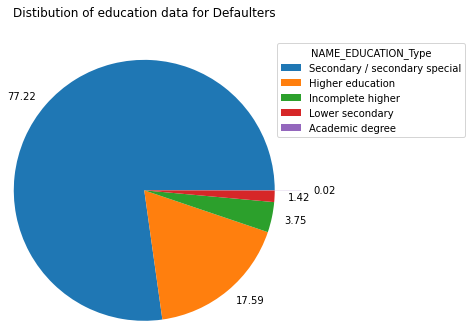

In [78]:
plot_pie(y=Edu_Target_1,title="Distibution of education data for Defaulters\n",legend= Edu_1_Names,
         col_name= "NAME_EDUCATION_Type")

In [79]:
#Education of Non-Defaulters:
Edu_Target_0= round(Target_0.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100,2) #Percentage distribution
Edu_0_Names = Edu_Target_0.index.tolist() #Unquie catergory in education

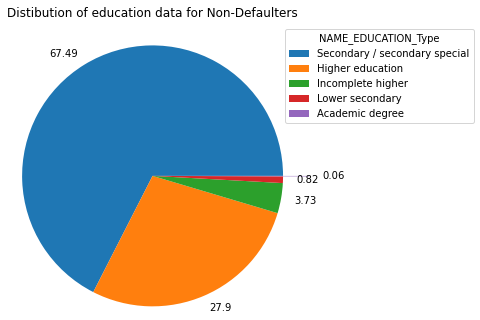

In [80]:
plot_pie(y=Edu_Target_0,title="Distibution of education data for Non-Defaulters",legend= Edu_0_Names,
         col_name= "NAME_EDUCATION_Type")

Above two Pie chart represents- distribution of Education type in Target data(Defaulter and Non-Defaulter). 
By comparing % of Defaulter and Non-Defaulter education qualification, We can observe :
- Increase in percentage of Defaulters who has "Secondary/Secondary special" education. 
- Decrease in percentage of Defaulters who has "Higher Education".

`2. NAME_FAMILY_STATUS` (Marital Status)

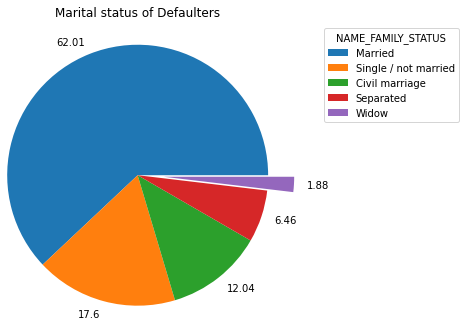

In [81]:
#Marital_Status of Defaulters
Marital_Target_1= round(Target_1.NAME_FAMILY_STATUS.value_counts(normalize=True)*100,2) #Percentage distribution
Marital_1_Names = Marital_Target_1.index.tolist() #Unquie catergory in Marital_status

#Pie plot for Defaulters
plot_pie(y=Marital_Target_1,title="Marital status of Defaulters",legend= Marital_1_Names,
         col_name= "NAME_FAMILY_STATUS")


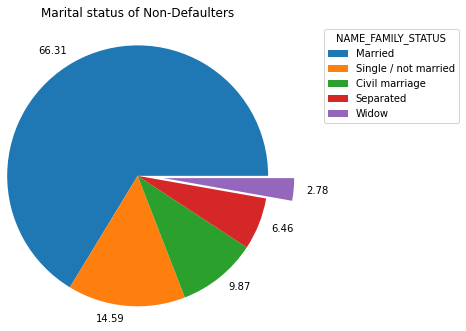

In [82]:
#Marital_Status of Non-Defaulters
Marital_Target_0= round(Target_0.NAME_FAMILY_STATUS.value_counts(normalize=True)*100,2) #Percentage distribution
Marital_0_Names = Marital_Target_0.index.tolist() #Unquie catergory in Marital_status

#Pie Plot for Non-Defaulters
plot_pie(y=Marital_Target_0,title="Marital status of Non-Defaulters",legend= Marital_0_Names,
         col_name= "NAME_FAMILY_STATUS")

By comparing % of Defaulter and Non-Defaulter Marital status, We can observe :

- Increase in percentage of Defaulters who are "Single"  and 'Civil Married' (% Defaulters under this category is more).
- Decrease in percentage of Defaulters who are "Married" and 'Widow' (% Non-defaulters under this category is more).

`3. Gender`

In [83]:
def plot_pie(y,title,legend,col_name):
    plt.pie(y, labels= y, radius=1.5, startangle=90)
    plt.title(title, pad=50)
    plt.legend(legend,title=col_name ,bbox_to_anchor=(2,1.2))
    plt.show()

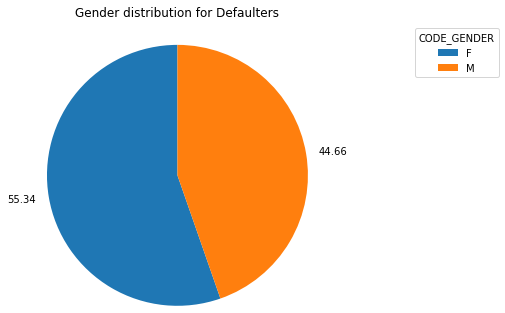

In [84]:
#Gender of Defaulters
Gender_Target_1= round(Target_1.CODE_GENDER.value_counts(normalize=True)*100,2) #Percentage distribution
Gender_1_Names = Gender_Target_1.index.tolist() #Unquie catergory in Gender

#Pie plot to reperesent Gender distribution for Defaulters
plot_pie(y=Gender_Target_1,title="Gender distribution for Defaulters",legend= Gender_1_Names,
         col_name= "CODE_GENDER")


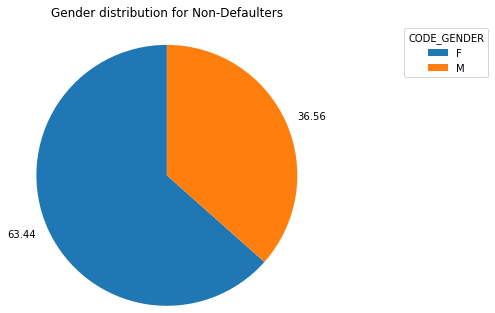

In [85]:
#Gender of Non-Defaulters
Gender_Target_0= round(Target_0.CODE_GENDER.value_counts(normalize=True)*100,2) #Percentage distribution
Gender_0_Names = Gender_Target_0.index.tolist() #Unquie catergory in Gender

#Pie plot to reperesent Gender distribution for Non-Defaulters
plot_pie(y=Gender_Target_0,title="Gender distribution for Non-Defaulters",legend= Gender_0_Names,
         col_name= "CODE_GENDER")


In both cases we can observe female are majority in both cases and by comparing between 1 and 0 target, there is:

- Increase in percentage of Male Defaulters (% Defaulters under this category is more in comparison with Non-defaulter).
- Decrease in percentage of Female defaulters (% Non-defaulters under this category is more in comparison with defaulter).

`4. Age Range type`

In [86]:
def plot_pie(y,title,legend,col_name):
    plt.pie(y, labels= y, radius=1.5, startangle=0)
    plt.title(title, pad=50)
    plt.legend(legend,title=col_name ,bbox_to_anchor=(2,1.2))
    plt.show()

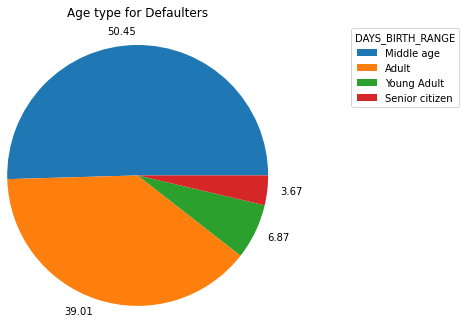

In [87]:
#Age type of Defaulters
Age_Target_1= round(Target_1.DAYS_BIRTH_RANGE.value_counts(normalize=True)*100,2) #Percentage distribution
Age_1_Names = Age_Target_1.index.tolist() #Unquie catergory in Age type

#Pie plot to reperesent Age type distribution for Defaulters
plot_pie(y=Age_Target_1,title="Age type for Defaulters",legend= Age_1_Names,
         col_name= "DAYS_BIRTH_RANGE")


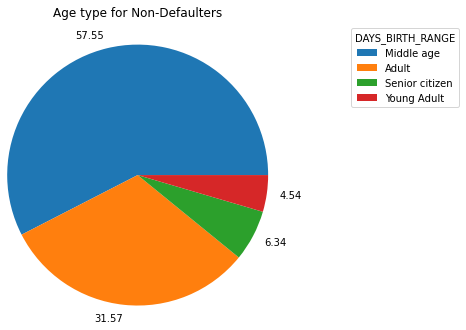

In [88]:
#Age type of Non-Defaulters
Age_Target_0= round(Target_0.DAYS_BIRTH_RANGE.value_counts(normalize=True)*100,2) #Percentage distribution
Age_0_Names = Age_Target_0.index.tolist() #Unquie catergory in Age type

#Pie plot to reperesent Age type distribution for Non-Defaulters
plot_pie(y=Age_Target_0,title="Age type for Non-Defaulters",legend= Age_0_Names,
         col_name= "DAYS_BIRTH_RANGE")


By comparing % of Defaulter and Non-Defaulter age group, We can observe :
- Increase % of Defaulters who are Young adults and Adults.
- Decrease % of Defaulters who are Senior citizen and Middle Aged.

`5. Income Source`

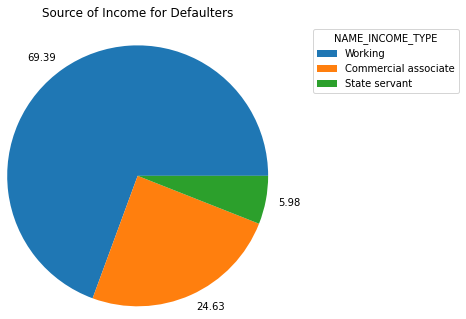

In [89]:
#Source of Income for Defaulters
IncomeT_Target_1= round(Target_1.NAME_INCOME_TYPE.value_counts(normalize=True)*100,2) #Percentage distribution
IncomeT_1_Names = IncomeT_Target_1.index.tolist() #Unquie catergory in Income_source

#Pie plot to reperesent Income_source distribution for Defaulters
plot_pie(y=IncomeT_Target_1,title="Source of Income for Defaulters",legend= IncomeT_1_Names,
         col_name= "NAME_INCOME_TYPE")


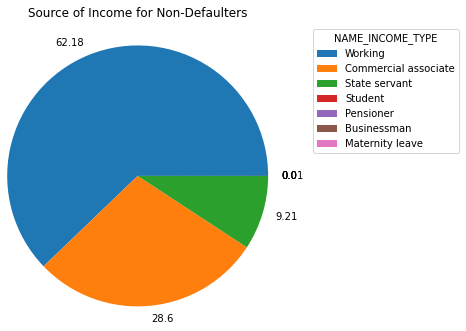

In [90]:
#Source of Income for Non-Defaulters
IncomeT_Target_0= round(Target_0.NAME_INCOME_TYPE.value_counts(normalize=True)*100,2) #Percentage distribution
IncomeT_0_Names = IncomeT_Target_0.index.tolist() #Unquie catergory in Income_source

#Pie plot to reperesent Income_source distribution for Non-Defaulters
plot_pie(y=IncomeT_Target_0,title="Source of Income for Non-Defaulters",legend= IncomeT_0_Names,
         col_name= "NAME_INCOME_TYPE")


We can observe defaulters Income type mainly falls under Working, Commercial associate & State servants category. In comparision with defaulter and non-defaulter % graph, we can say that:
- Increase in percentage of defaulters who are 'working'.
- Decrease in percentage of defaulters who are 'Commercial associate' & 'State servants'.

`6. Organization Type`

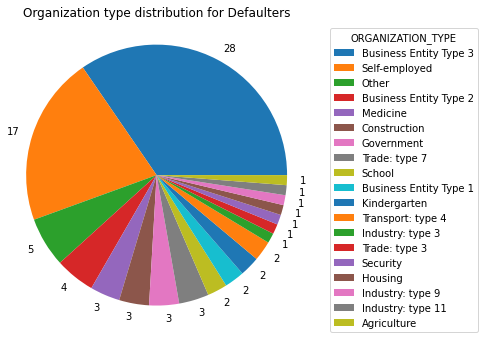

In [91]:
#Working type of organization of Defaulter 

WorkT_Target_1= round(Target_1.ORGANIZATION_TYPE.value_counts(normalize=True)*100,2).astype(int) #percentage
WorkT_Target_1 = WorkT_Target_1[~(WorkT_Target_1==0)] #considering only >0 % values for better visualization

WorkT_1_Names = WorkT_Target_1.index.tolist() #Unquie catergory in Organization type

#Pie plot to reperesent Organization type distribution for Defaulters
plot_pie(y=WorkT_Target_1,title="Organization type distribution for Defaulters",legend= WorkT_1_Names,
         col_name= "ORGANIZATION_TYPE")


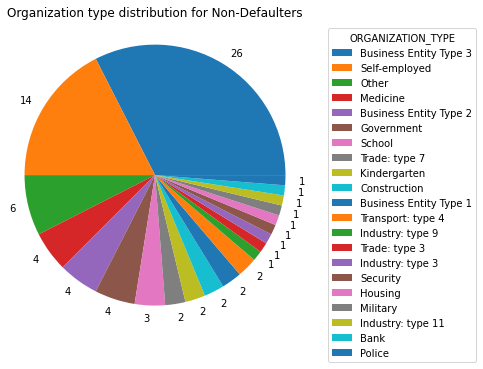

In [92]:
#Working type of organization of Non-Defaulter 

WorkT_Target_0= round(Target_0.ORGANIZATION_TYPE.value_counts(normalize=True)*100,2).astype(int) #percentage
WorkT_Target_0 = WorkT_Target_0[~(WorkT_Target_0==0)] #considering only >0 % values for better visualization

WorkT_0_Names = WorkT_Target_0.index.tolist() #Unquie catergory in Organization type

#Pie plot to reperesent Organization type distribution for Non-Defaulters
plot_pie(y=WorkT_Target_0,title="Organization type distribution for Non-Defaulters",legend= WorkT_0_Names,
         col_name= "ORGANIZATION_TYPE")


No major changes are observed between defaulters and non-defaulter organization type. Loan applicants are majorly from Business Entity Type 3 organization or self employed.

`7. Income Range`

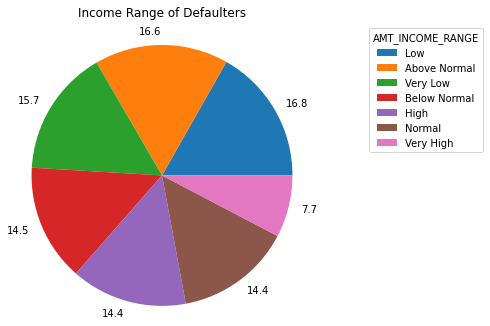

In [93]:
#Income Range of Defaulters
IncomeR_Target_1= round(Target_1.AMT_INCOME_RANGE.value_counts(normalize=True)*100,1) #Percentage distribution
IncomeR_1_Names = IncomeR_Target_1.index.tolist() #Unquie catergory in Income_range

#Pie plot to reperesent Income_Range distribution for Defaulters
plot_pie(y=IncomeR_Target_1,title="Income Range of Defaulters",legend= IncomeR_1_Names,
         col_name= "AMT_INCOME_RANGE")


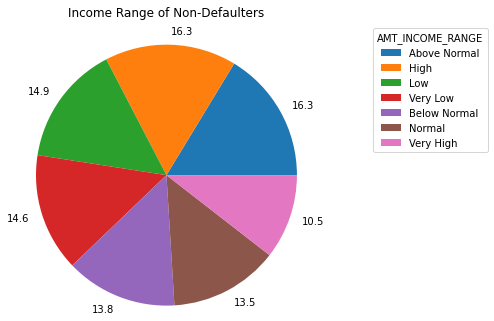

In [94]:
#Income Range of Non-Defaulters
IncomeR_Target_0= round(Target_0.AMT_INCOME_RANGE.value_counts(normalize=True)*100,1) #Percentage distribution
IncomeR_0_Names = IncomeR_Target_0.index.tolist() #Unquie catergory in Income_range

#Pie plot to reperesent Income_Range distribution for Non-Defaulters
plot_pie(y=IncomeR_Target_0,title="Income Range of Non-Defaulters",legend= IncomeR_0_Names,
         col_name= "AMT_INCOME_RANGE")


We can observe decrease in percentage of deafulters with very high income range.

`8. Housing`

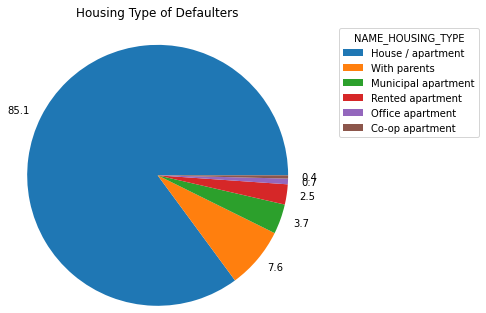

In [95]:
#Housing Type of Defaulters
HousingT_Target_1= round(Target_1.NAME_HOUSING_TYPE.value_counts(normalize=True)*100,1) #Percentage distribution
HousingT_1_Names = HousingT_Target_1.index.tolist() #Unquie catergory in Housing Type

#Pie plot to reperesent Housing Type distribution for Defaulters
plot_pie(y=HousingT_Target_1,title="Housing Type of Defaulters",legend= HousingT_1_Names,
         col_name= "NAME_HOUSING_TYPE")

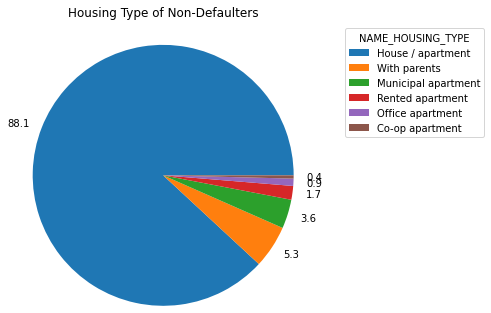

In [96]:
#Housing Type of Non-Defaulters
HousingT_Target_0= round(Target_0.NAME_HOUSING_TYPE.value_counts(normalize=True)*100,1) #Percentage distribution
HousingT_0_Names = HousingT_Target_0.index.tolist() #Unquie catergory in Housing Type

#Pie plot to reperesent Housing Type distribution for Non-Defaulters
plot_pie(y=HousingT_Target_0,title="Housing Type of Non-Defaulters",legend= HousingT_0_Names,
         col_name= "NAME_HOUSING_TYPE")

We can observe increase in percentage of defaulters who lives with their parents in comaprision with Non-defaulter.

`9. NAME_CONTRACT_TYPE (Type of loan)`

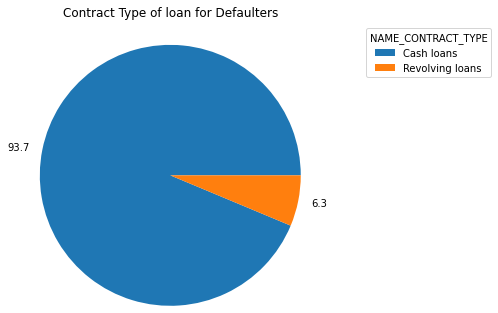

In [97]:
#Contract Type of loan for Defaulters
LoanT_Target_1= round(Target_1.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100,1) #Percentage distribution
LoanT_1_Names = LoanT_Target_1.index.tolist() #Unquie catergory in Contract Type

#Pie plot to reperesent Loan Contract Type distribution for Defaulters
plot_pie(y=LoanT_Target_1,title="Contract Type of loan for Defaulters",legend= LoanT_1_Names,
         col_name= "NAME_CONTRACT_TYPE")

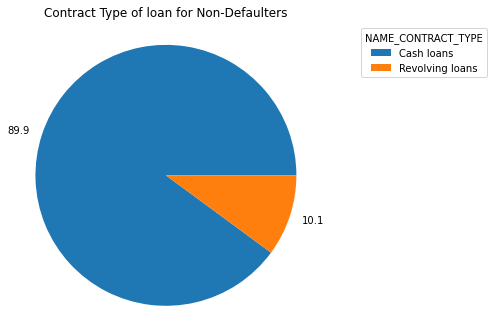

In [98]:
#Contract Type of loan for Non-Defaulters
LoanT_Target_0= round(Target_0.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100,1) #Percentage distribution
LoanT_0_Names = LoanT_Target_0.index.tolist() #Unquie catergory in Contract Type

#Pie plot to reperesent Loan Contract Type distribution for Non-Defaulters
plot_pie(y=LoanT_Target_0,title="Contract Type of loan for Non-Defaulters",legend= LoanT_0_Names,
         col_name= "NAME_CONTRACT_TYPE")

In both cases we can observe cash loan are majority, perferred more.So, Defaulters % is also more in Cash loan and lesser with revolving loans.

`10. Suite Type` (Accompanied by)

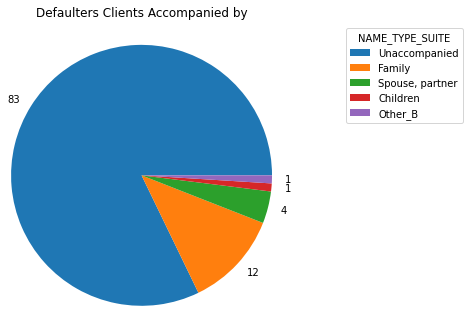

In [99]:
#Client accompanied by while applying for loan for Defaulters:
SuiteT_Target_1= round(Target_1.NAME_TYPE_SUITE.value_counts(normalize=True)*100,0).astype(int) #Percentage distribution
SuiteT_Target_1= SuiteT_Target_1[~(SuiteT_Target_1==0)] #considering >0 % values for better visualization

SuiteT_1_Names = SuiteT_Target_1.index.tolist() #Unquie catergory in Suite Type

#Pie plot to reperesent Suite Type distribution for Defaulters
plot_pie(y=SuiteT_Target_1,title="Defaulters Clients Accompanied by",legend= SuiteT_1_Names,
         col_name= "NAME_TYPE_SUITE")

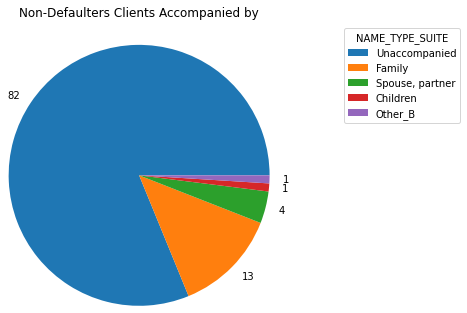

In [100]:
#Client accompanied by while applying for loan for Non-Defaulters:
SuiteT_Target_0= round(Target_0.NAME_TYPE_SUITE.value_counts(normalize=True)*100,0).astype(int) #Percentage distribution
SuiteT_Target_0= SuiteT_Target_0[~(SuiteT_Target_0==0)] #considering >0 % values for better visualization

SuiteT_0_Names = SuiteT_Target_0.index.tolist() #Unquie catergory in Suite Type

#Pie plot to reperesent Suite Type distribution for Defaulters
plot_pie(y=SuiteT_Target_0,title="Non-Defaulters Clients Accompanied by",legend= SuiteT_0_Names,
         col_name= "NAME_TYPE_SUITE")

No major changes are observed between defaulters and non-defaulter suite type

`11. Occupation type`

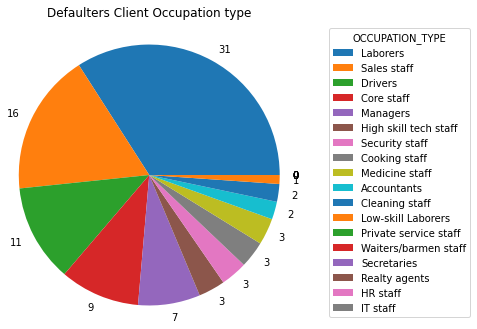

In [101]:
#Client Occupation type for Defaulters:
OccupationT_Target_1= round(Target_1[~(Target_1["OCCUPATION_TYPE"]== "Missing")]["OCCUPATION_TYPE"].value_counts(normalize=True)*100,1).astype(int) #Percentage distribution
OccupationT_1_Names = OccupationT_Target_1.index.tolist() #Unquie catergory in Occupation Type

#Pie plot to reperesent Occupation Type distribution for Defaulters
plot_pie(y=OccupationT_Target_1,title="Defaulters Client Occupation type",legend= OccupationT_1_Names,
         col_name= "OCCUPATION_TYPE")

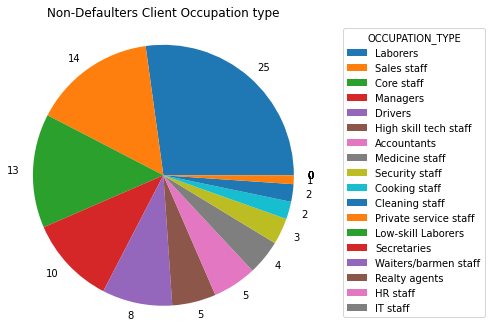

In [102]:
#Client Occupation type for Non-Defaulters:
OccupationT_Target_0= round(Target_0[~(Target_0["OCCUPATION_TYPE"]== "Missing")]["OCCUPATION_TYPE"].value_counts(normalize=True)*100,1).astype(int) #Percentage distribution
OccupationT_0_Names = OccupationT_Target_0.index.tolist() #Unquie catergory in Occupation Type

#Pie plot to reperesent Occupation Type distribution for Non-Defaulters
plot_pie(y=OccupationT_Target_0,title="Non-Defaulters Client Occupation type",legend= OccupationT_0_Names,
         col_name= "OCCUPATION_TYPE")

We can observe increase in defaulter % who are 'Laborers', 'Sales staff', 'Drivers' and decrease in defaulter % who are 'Core staff'.

`12. WEEKDAY_APPR_PROCESS_START`

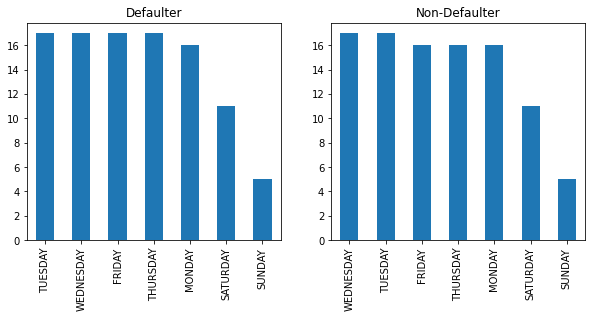

In [103]:
#On which day of the week did the client apply for the loan (Defaulters):
DAY_Target_1= round(Target_1.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True)*100,0).astype(int) #Percentage distribution
DAY_1_Names = DAY_Target_1.index.tolist() #Days in a week

#On which day of the week did the client apply for the loan (Non-Defaulters):
DAY_Target_0= round(Target_0.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True)*100,0).astype(int) #Percentage distribution
DAY_0_Names = DAY_Target_0.index.tolist() #Days in a week

#subploting the data
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
DAY_Target_1.plot.bar()
plt.title("Defaulter")
plt.subplot(1,2,2)
DAY_Target_0.plot.bar()
plt.title("Non-Defaulter")
plt.show()


#### Univariant analysis for different Numerical data/variables

In [104]:
#defining function for plotting distplot and boxplot chart for differnet Numerical variables:

def plot_dis_bar(Target,col_name):
    sns.set_style("whitegrid")
    fig, ax=plt.subplots(ncols=2,nrows=1, figsize=(20,8)) 
    ax[0].set_title("Distribution plot")
    sns.distplot(Target[col_name], ax=ax[0], color="darkcyan", kde=True)
    plt.yscale('linear')
    
    ax[1].set_title("Box plot")
    sns.boxplot(data=Target, x=col_name, ax=ax[1], orient="v", color="cyan")
    plt.yscale('linear')
    plt.show()

`1. AMT_ANNUITY`

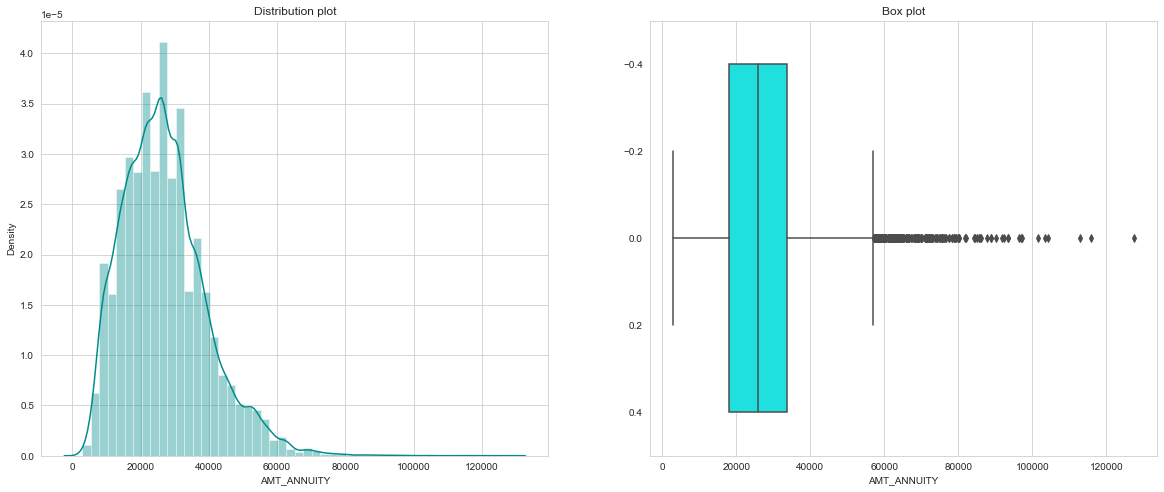

In [105]:
#Defaulters Loan annuity:
plot_dis_bar(Target=Target_1, col_name="AMT_ANNUITY")

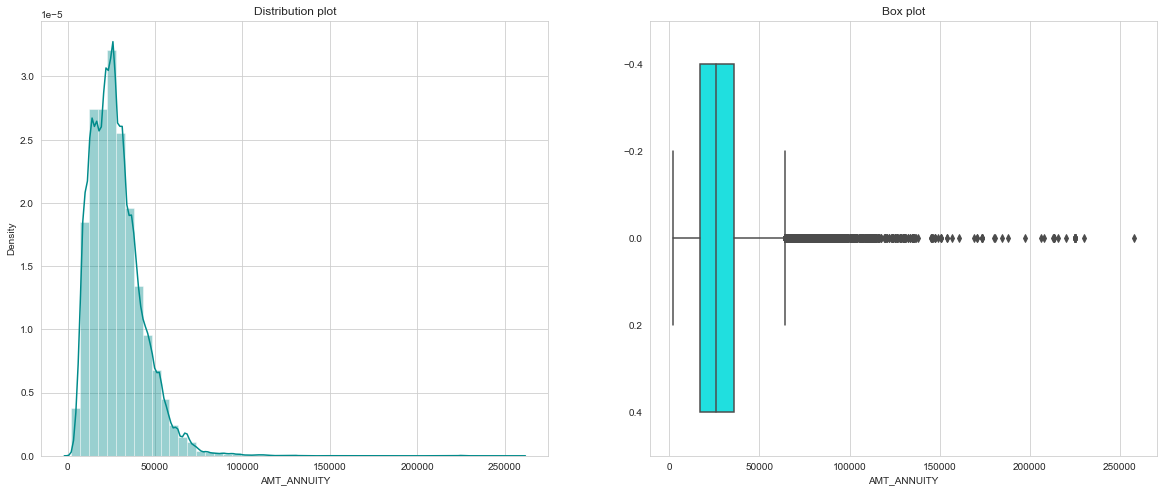

In [106]:
#Non-Defaulters Loan annuity:
plot_dis_bar(Target=Target_0, col_name="AMT_ANNUITY")

- We can observe few outliers in Non-Defaulter annuity. 
- Q1 is bigger than Q3, so most of the clients are from first quartile.

`2. AMT_Credit`

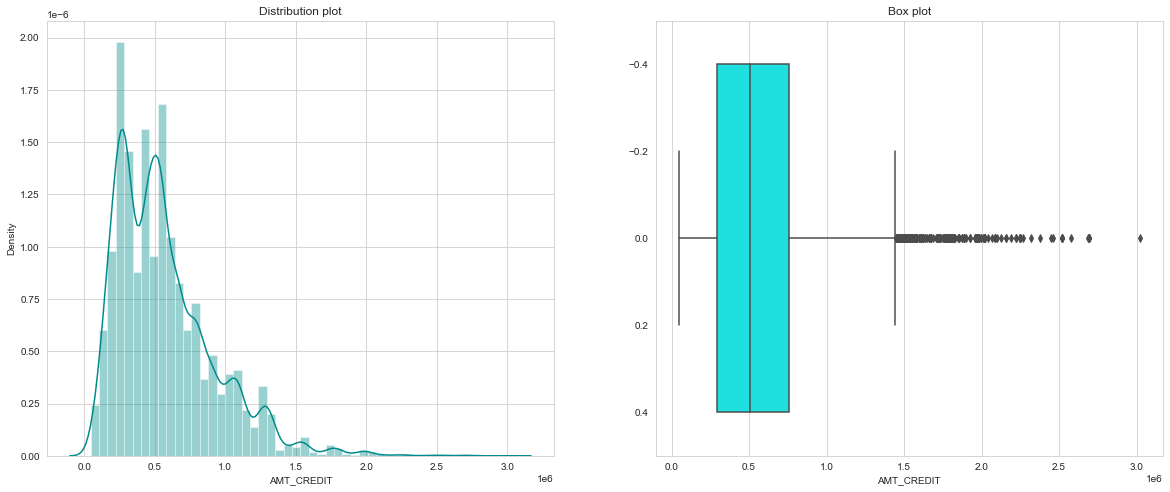

In [107]:
#Defaulters Loan Credit:
plot_dis_bar(Target=Target_1, col_name="AMT_CREDIT")

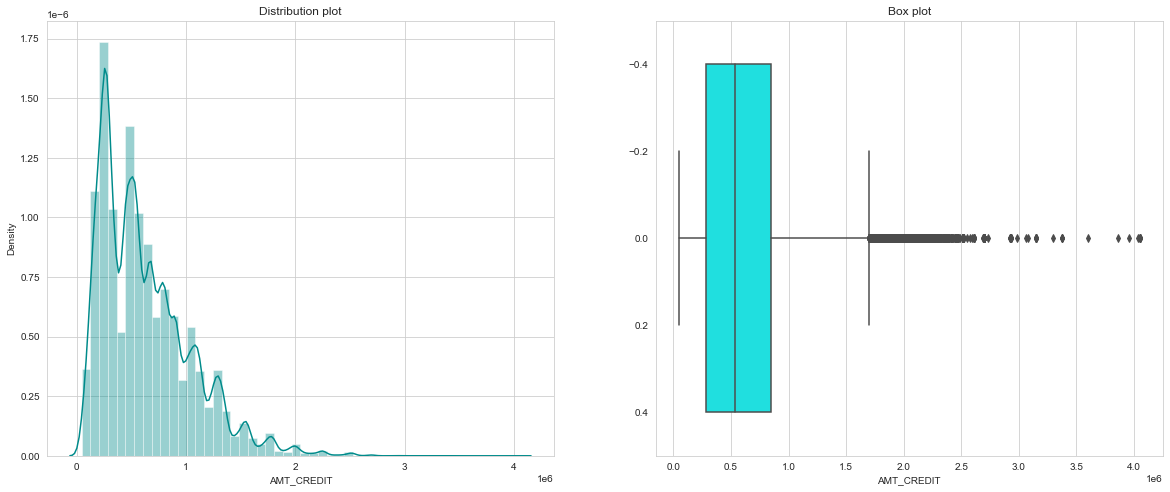

In [108]:
#Non-Defaulters Loan Credit:
plot_dis_bar(Target=Target_0, col_name="AMT_CREDIT")

We can observe some outliers and non-normal distrubtion.

`3. AMT_GOODS_PRICE`

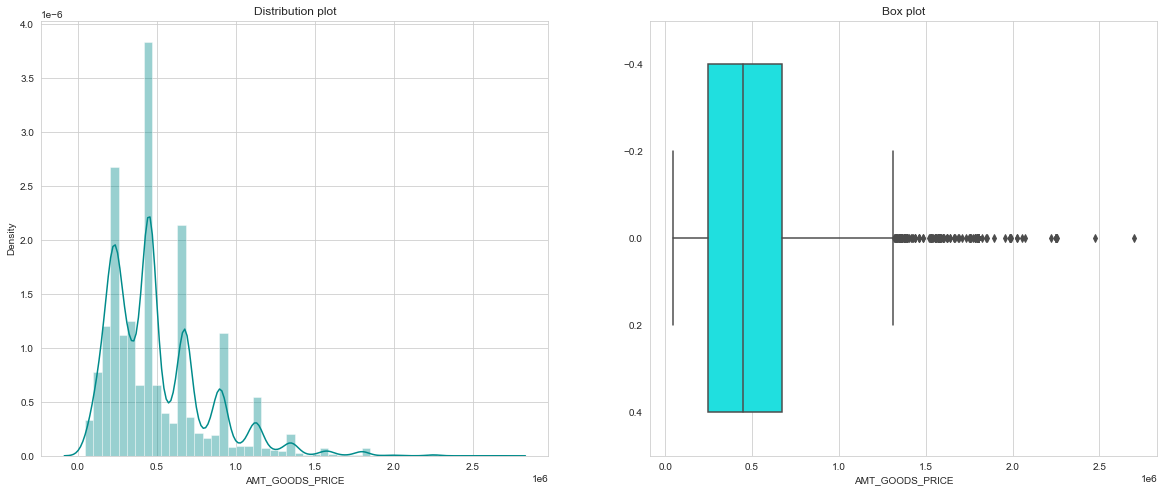

In [109]:
#Defaulters Goods price:
plot_dis_bar(Target=Target_1, col_name="AMT_GOODS_PRICE")

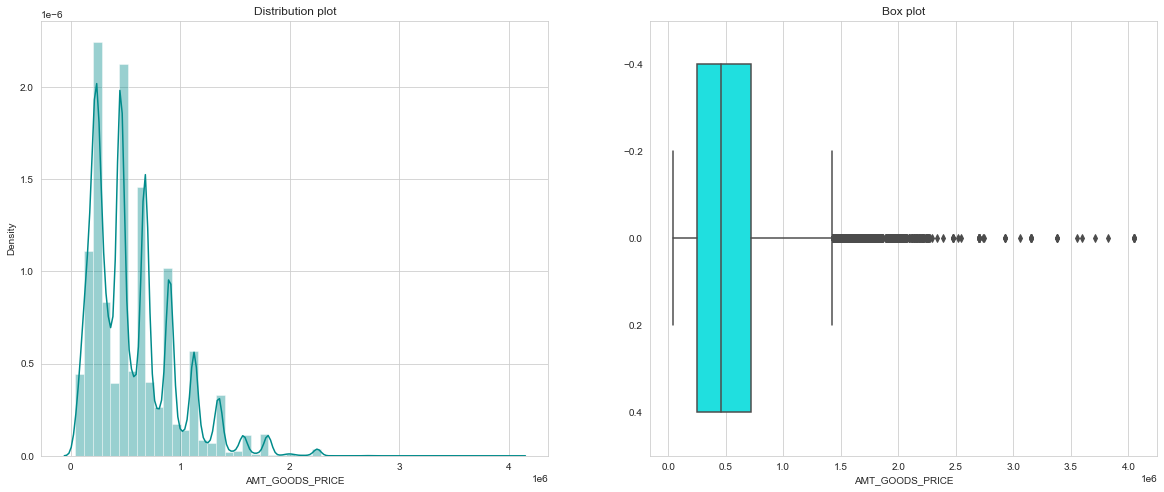

In [110]:
#Non-Defaulters Goods price:
plot_dis_bar(Target=Target_0, col_name="AMT_GOODS_PRICE")

We can observe some outliers and comb distribution.

`4. CNT_Child`

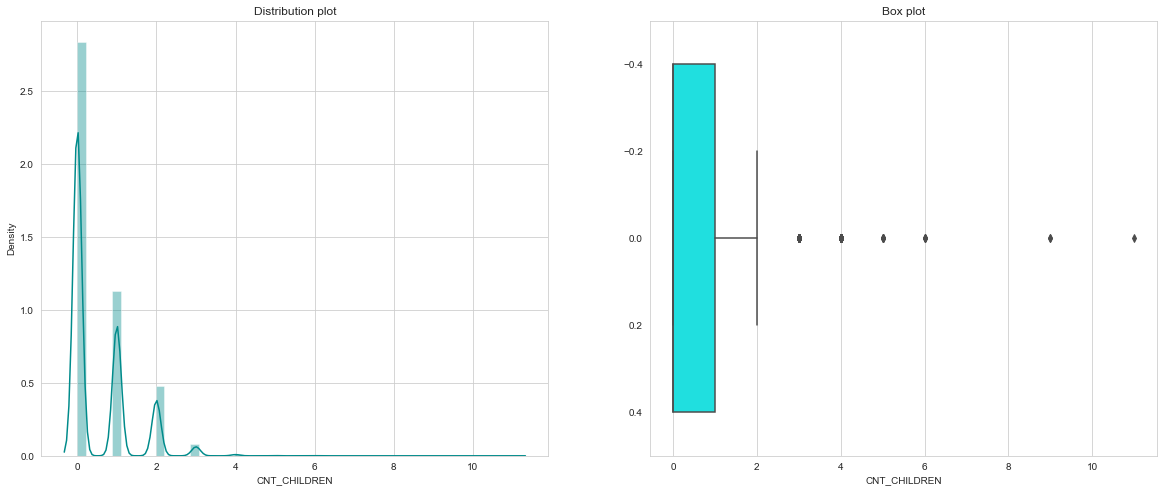

In [111]:
#Number of childern of Defaulters:
plot_dis_bar(Target=Target_1, col_name="CNT_CHILDREN")

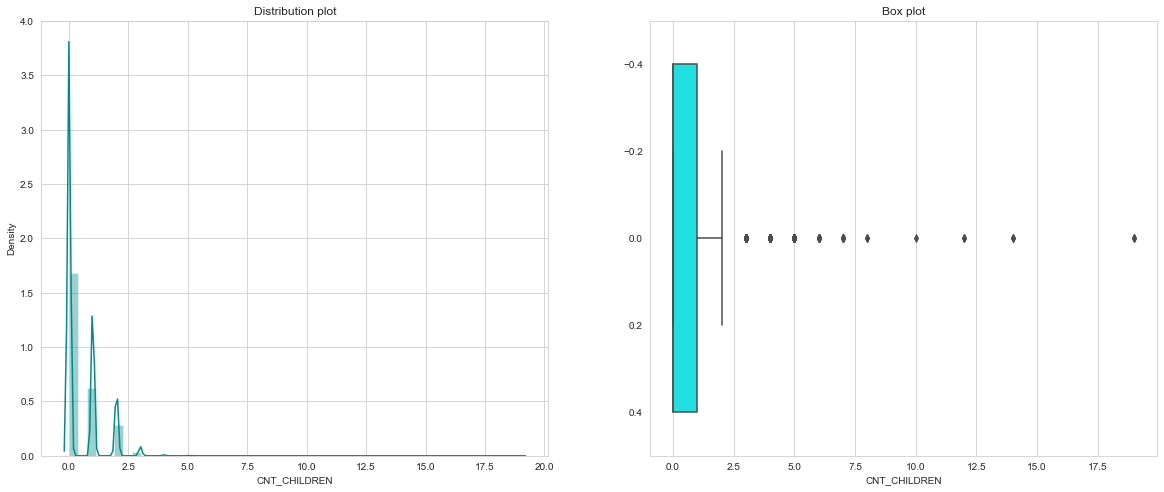

In [112]:
#Number of childern of Non-Defaulters:
plot_dis_bar(Target=Target_0, col_name="CNT_CHILDREN")

We can observe outliers and 50% of the applicant in both the targets have no children.

`5. CNT_FAM_MEMBERS`

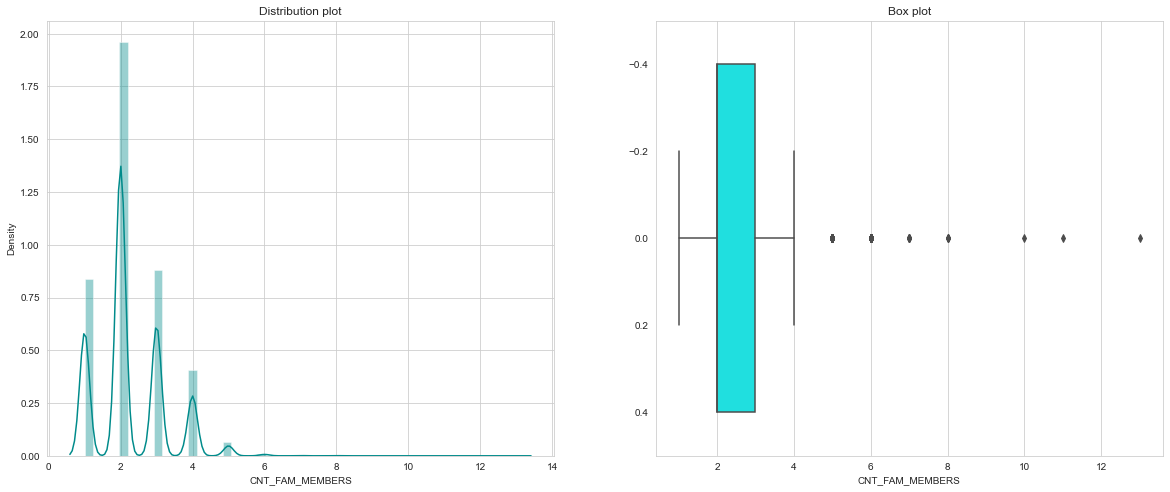

In [113]:
#Family size of Defaulters:
plot_dis_bar(Target=Target_1, col_name="CNT_FAM_MEMBERS")

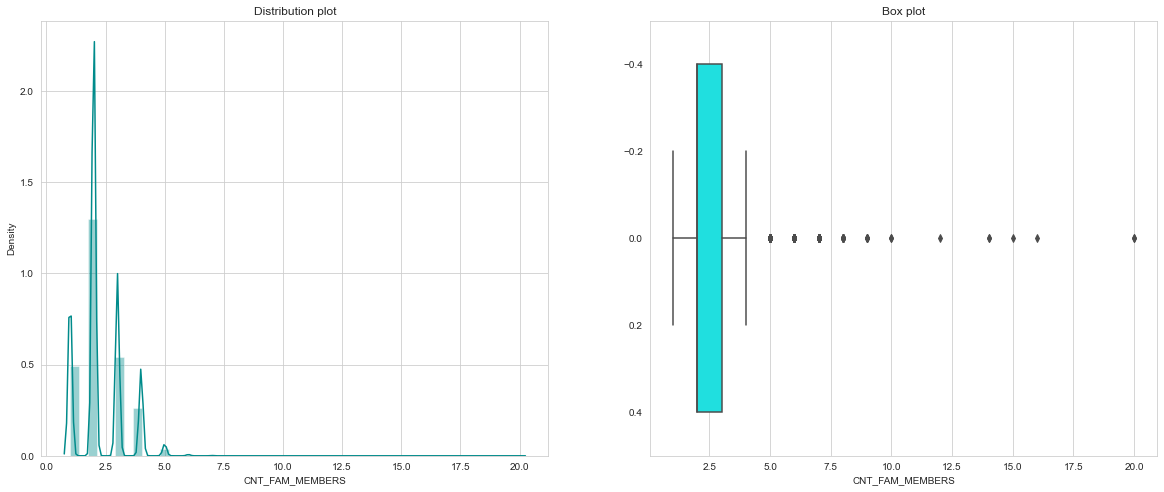

In [114]:
#Family size of Non-Defaulters:
plot_dis_bar(Target=Target_0, col_name="CNT_FAM_MEMBERS")

We can observe some outliers. No major observation between Defaulter and non-defaulter.

#### Bivariate analysis for categorical variables vs numerical variables

In [115]:
#defining function for boxplot chart for different categorical variables vs numerical variables:

def box_plot(Target, X, Y, Title):
    plt.xticks(rotation=45)
    plt.yscale("log")
    sns.boxplot(data=Target, x=X, y=Y)
    plt.title(Title)
    plt.show()

1. 'NAME_EDUCATION_TYPE' vs 'AMT_CREDIT'

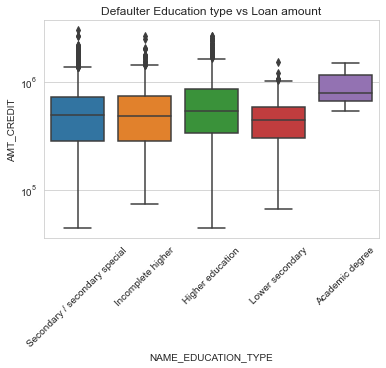

In [116]:
#Defaulter Education type vs Loan amount

box_plot(Target= Target_1, X= "NAME_EDUCATION_TYPE", Y="AMT_CREDIT", Title="Defaulter Education type vs Loan amount")


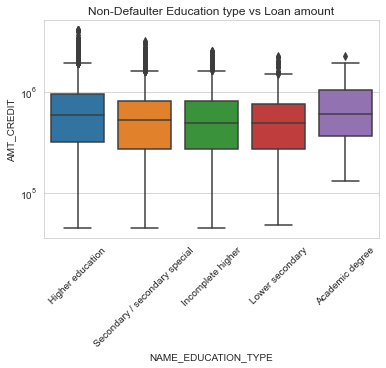

In [117]:
#Non-Defaulter Education type vs Loan amount

box_plot(Target= Target_0, X= "NAME_EDUCATION_TYPE", Y="AMT_CREDIT", Title="Non-Defaulter Education type vs Loan amount")


In the above graphs of Education type vs loan amount for Defaulter and Non-Defaulter, can observe Defaulter applicant with Academic degree type of education are having higher credit/loan amount than others. 

2. 'NAME_EDUCATION_TYPE' vs 'AMT_INCOME_TOTAL'

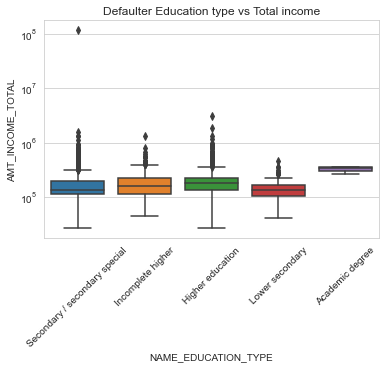

In [118]:
#Defaulter Education type vs Total income

box_plot(Target= Target_1, X= "NAME_EDUCATION_TYPE", Y="AMT_INCOME_TOTAL", Title="Defaulter Education type vs Total income")


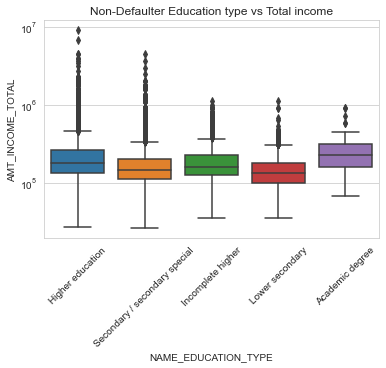

In [119]:
#Non-Defaulter Education type vs Total income

box_plot(Target= Target_0, X= "NAME_EDUCATION_TYPE", Y="AMT_INCOME_TOTAL", Title="Non-Defaulter Education type vs Total income")


In the above graphs of Education type vs Total income for Defaulter and Non-Defaulter, can observe Defaulter applicant with Academic degree are having higher income than others at low extreme.

3. 'NAME_FAMILY_STATUS' vs 'AMT_CREDIT'

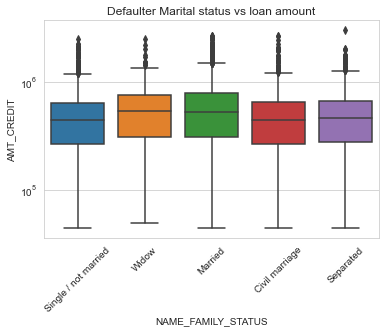

In [120]:
#Defaulter marital status vs loan amount

box_plot(Target= Target_1, X= "NAME_FAMILY_STATUS", Y="AMT_CREDIT", Title="Defaulter Marital status vs loan amount")


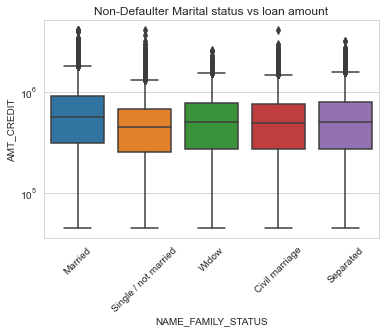

In [121]:
#Non-Defaulter marital status vs loan amount

box_plot(Target= Target_0, X= "NAME_FAMILY_STATUS", Y="AMT_CREDIT", Title="Non-Defaulter Marital status vs loan amount")


Above graphs of Marital status vs loan amount for Defaulter and Non-Defaulter, appears to be similar. Single/ Not married appears be on the higher side to be a defaulter. Married Non-Defaulter has higher loan amount than other.

4. 'NAME_FAMILY_STATUS' vs 'AMT_INCOME_TOTAL'

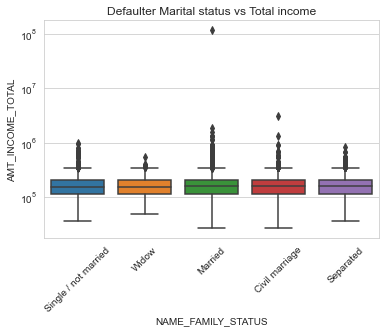

In [122]:
#Defaulter marital status vs Total income

box_plot(Target= Target_1, X= "NAME_FAMILY_STATUS", Y="AMT_INCOME_TOTAL", Title="Defaulter Marital status vs Total income")


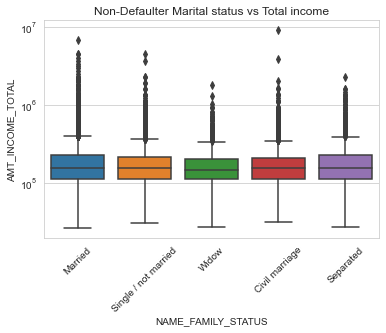

In [123]:
#Non-Defaulter marital status vs Total income

box_plot(Target= Target_0, X= "NAME_FAMILY_STATUS", Y="AMT_INCOME_TOTAL", Title="Non-Defaulter Marital status vs Total income")


Above graphs of Marital status vs Total income for Defaulter and Non-Defaulter, can observe: 'Single/not married', 'Seperated', 'civil married' and 'Married' are having higher income.

5. Income_Range vs AMT credit

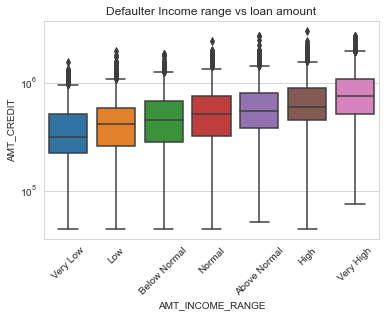

In [124]:
#Defaulter Income range vs loan amount

box_plot(Target= Target_1, X= "AMT_INCOME_RANGE", Y="AMT_CREDIT", Title="Defaulter Income range vs loan amount")


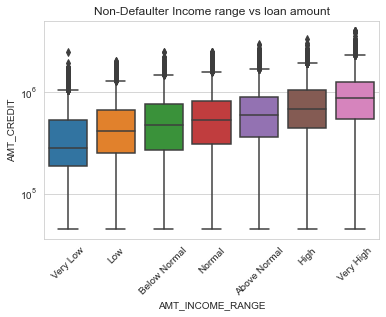

In [125]:
#Non-Defaulter Income range vs loan amount

box_plot(Target= Target_0, X= "AMT_INCOME_RANGE", Y="AMT_CREDIT", Title="Non-Defaulter Income range vs loan amount")


Above graphs of Marital status vs loan amount for Defaulter and Non-Defaulter, appears to be similar. Lower income range has low credit/loan amount.

#### Bivariate analysis for categorical variables vs categorical variables

In [126]:
#Defining function for countplot chart for different Categorical variables vs Categorical variables:

def count_plot(Target, col_name,title,hue):
    sns.set(style="darkgrid")
    template =pd.Series(data= hue)
    fig, ax =plt.subplots()
    width=len(Target[col_name].unique())+5+2*len(template.unique())
    fig.set_size_inches(width,6)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    
    ax= sns.countplot(data=Target, x=col_name, order=Target[col_name].value_counts().index, hue=hue)
    plt.show()

1. Gender vs Income Range

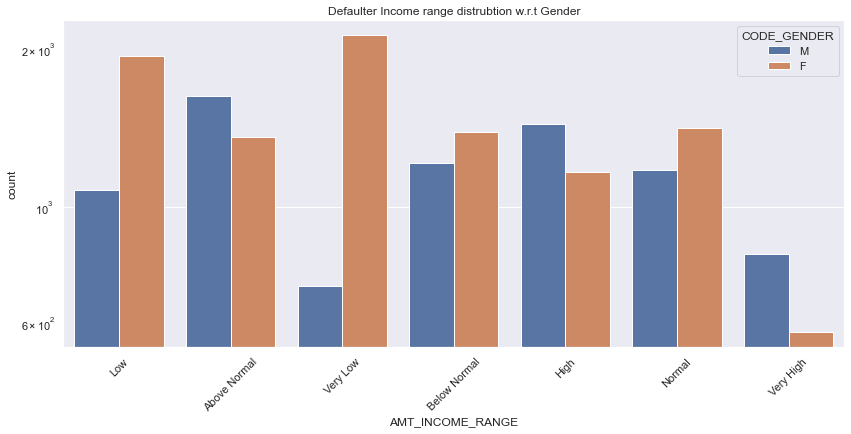

In [127]:
#Defaulter gender vs income range:

count_plot(Target=Target_1, col_name="AMT_INCOME_RANGE" ,title= "Defaulter Income range distrubtion w.r.t Gender",hue = "CODE_GENDER")

From the above graph, We can observe: Male count is higher than Female in defaulter list. Female defaulter are more in 'Very low' and 'Low' income.

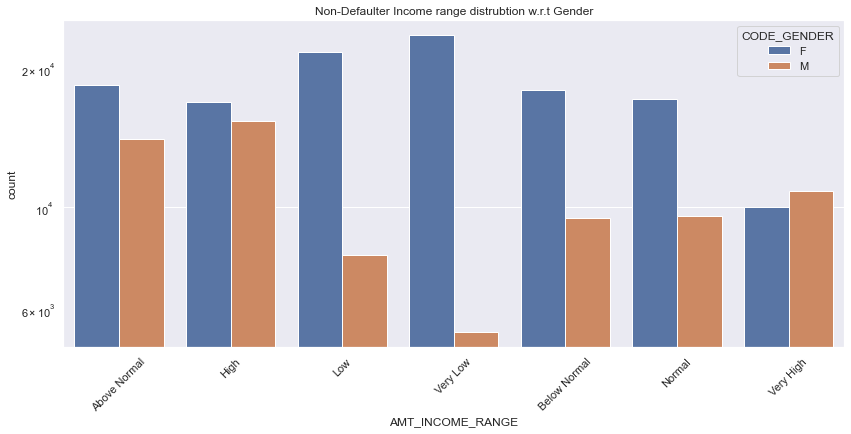

In [128]:
#Non-Defaulter gender vs income range:

count_plot(Target=Target_0, col_name="AMT_INCOME_RANGE" ,title= "Non-Defaulter Income range distrubtion w.r.t Gender",hue = "CODE_GENDER")

From the above graph, We can observe: Female count is higher than Male in Non-defaulter list, under all range of income. 

2. Gender vs Income type

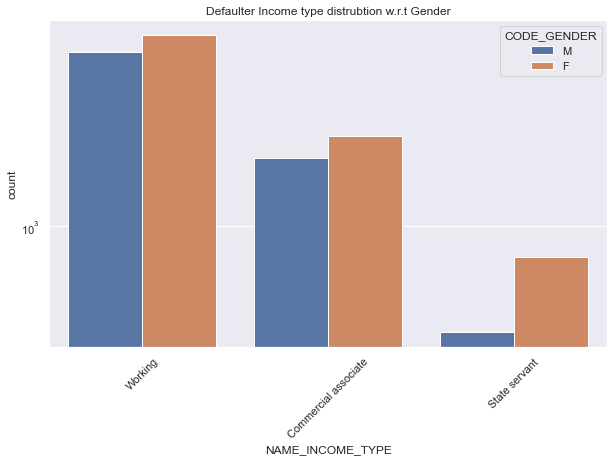

In [129]:
#Defaulter gender vs income type:

count_plot(Target=Target_1, col_name="NAME_INCOME_TYPE" ,title= "Defaulter Income type distrubtion w.r.t Gender",hue = "CODE_GENDER")

From the above graph,we can observe Male count is more than female in defaulter list. Majority of defaulters are working type.

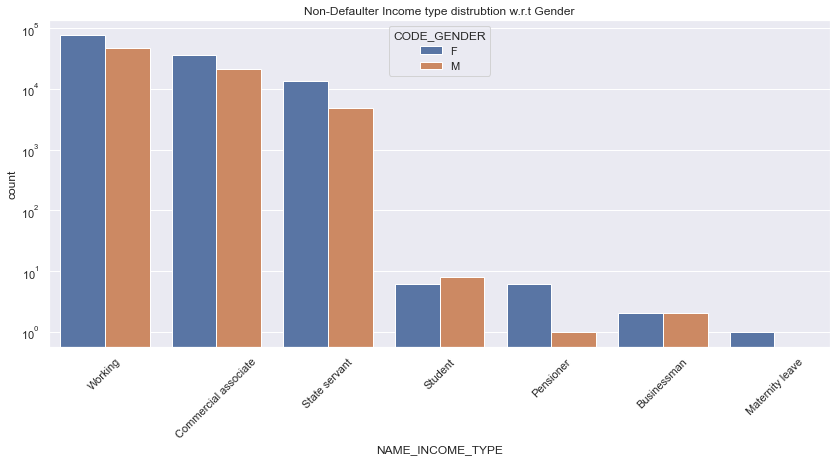

In [130]:
#Non-Defaulter gender vs income type:

count_plot(Target=Target_0, col_name="NAME_INCOME_TYPE" ,title= "Non-Defaulter Income type distrubtion w.r.t Gender",hue = "CODE_GENDER")

From the above graph, we can observe females count is more than male in non-defaulter list. Majority of loans credited for 'Working', 'Commercial associate' and 'State servant'. There is less no. of loan credited to 'Students', 'Pensioner', Businessman' and lesser number credited during maternity leave.

3. Gender vs Contract type

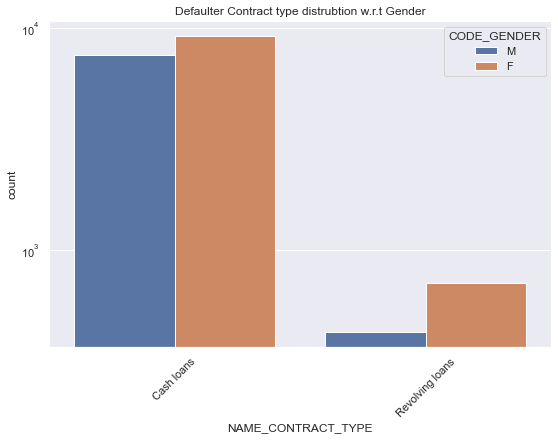

In [131]:
#Defaulter gender vs Contract type:

count_plot(Target=Target_1, col_name="NAME_CONTRACT_TYPE" ,title= "Defaulter Contract type distrubtion w.r.t Gender",hue = "CODE_GENDER")

From the above graph,we can observe Male count is more than female in defaulter list. Majority of defaulters are from Cash loans as this type of loan is prefered most by the clients.

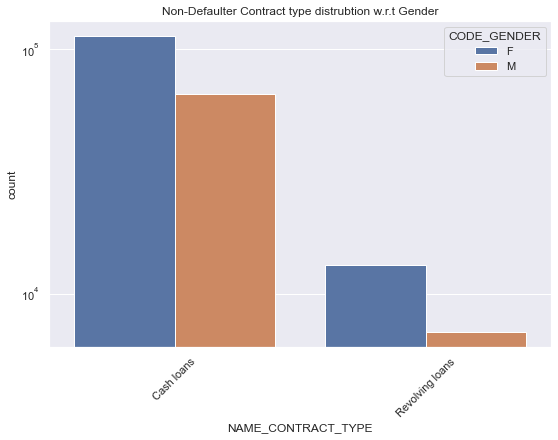

In [132]:
#Non-Defaulter gender vs Contract type:

count_plot(Target=Target_0, col_name="NAME_CONTRACT_TYPE" ,title= "Non-Defaulter Contract type distrubtion w.r.t Gender",hue = "CODE_GENDER")

From the above graph,we can observe Female count is more than Male in Non-defaulter list. Majority of the loans are of Cash loan which is prefered more than Revolving loans.

4. Gender vs Occupation type

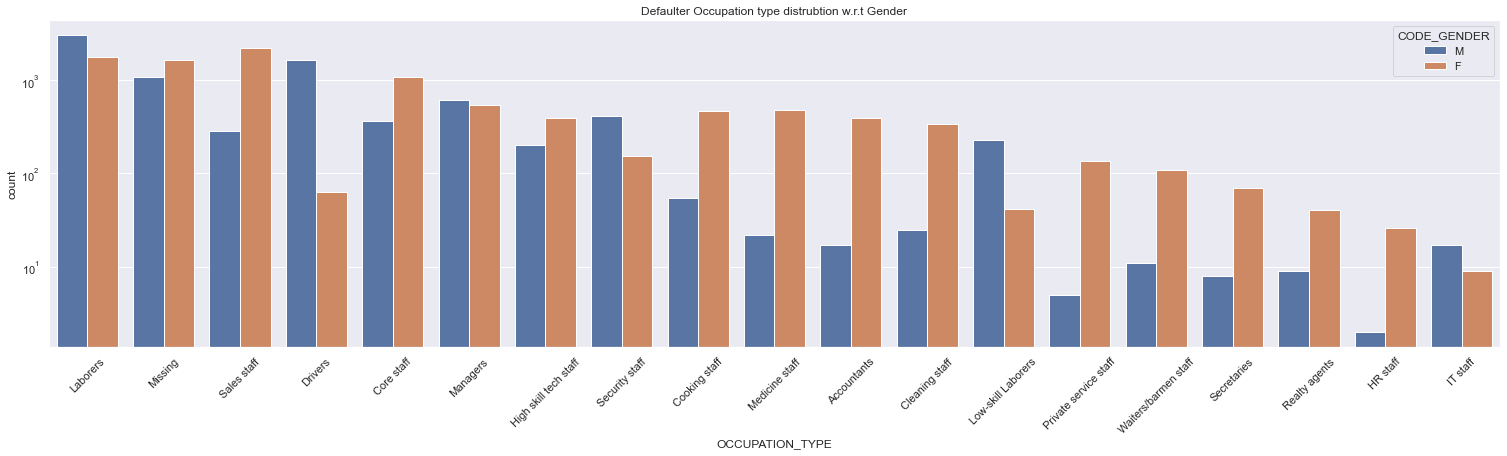

In [133]:
#Defaulter gender vs Occupation type:

count_plot(Target=Target_1, col_name="OCCUPATION_TYPE" ,
           title= "Defaulter Occupation type distrubtion w.r.t Gender",hue = "CODE_GENDER")

From the above graph,we can observe Male count is more than female in defaulter list. We can observe increase in defaulter % who are 'Laborers', 'Sales staff', 'Drivers'. 

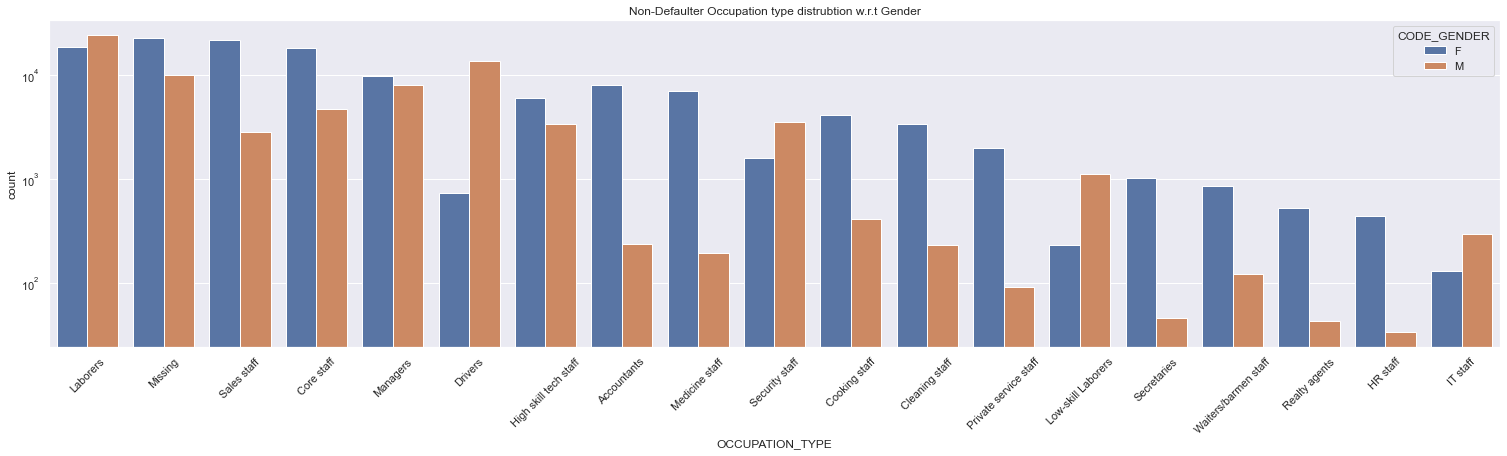

In [134]:
#Non-Defaulter gender vs Occupation type:

count_plot(Target=Target_0, col_name="OCCUPATION_TYPE" ,
           title= "Non-Defaulter Occupation type distrubtion w.r.t Gender",hue = "CODE_GENDER")

From the above graph,we can observe Female count is more than Male in Non-defaulter list.We can observe decrease in defaulter % who are 'Core staff'.

5. Gender vs education type

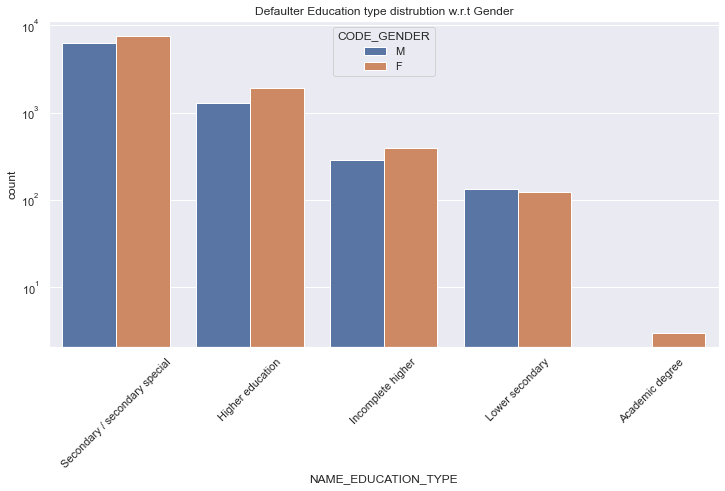

In [135]:
#Defaulter gender vs Education type:

count_plot(Target=Target_1, col_name="NAME_EDUCATION_TYPE" ,
           title= "Defaulter Education type distrubtion w.r.t Gender",hue = "CODE_GENDER")

Yet again Male is leading in the defalter list. Interesting observation is Male with academic degree education is not seen as defaulter here. Since, Majority of loans given for education type 'Secondary' and 'Higher education' defaulter under this type is also high. 

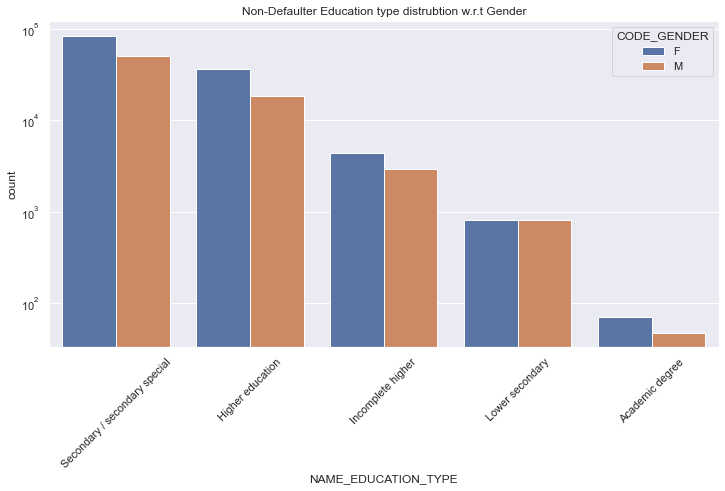

In [136]:
#Non-Defaulter gender vs Education type:

count_plot(Target=Target_0, col_name="NAME_EDUCATION_TYPE" ,
           title= "Non-Defaulter Education type distrubtion w.r.t Gender",hue = "CODE_GENDER")

In the above graph, we can observe Female non-defaulters is more than Male. Less number of loan provided for clients with academic degree and Majority of loan given/applied by the clients with 'Secondary' / 'Higher education'

#### Bivariate analysis for Numerical variables vs Numerical variables

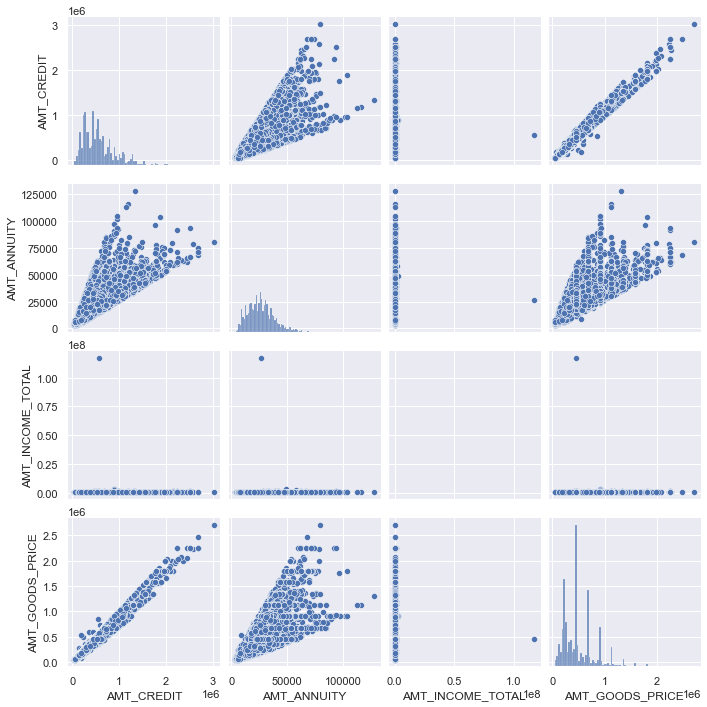

In [137]:
#Analysis of different numerical variables for Defaulters: Pairplot

sns.pairplot(data=Target_1, vars=['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE'])
plt.show()

In the above plots, at ax[0][3] and ax[3][0], loan amount vs goods price, we can observe positive linear correlation 

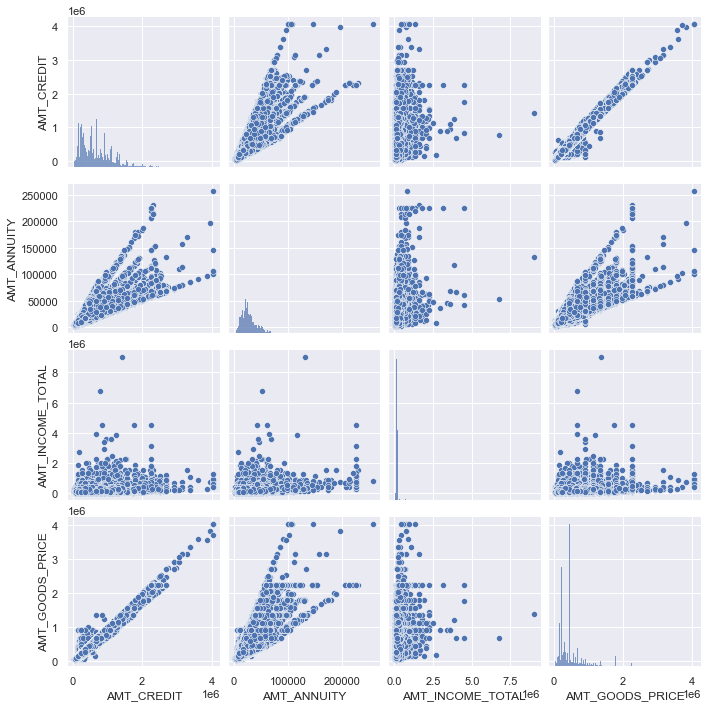

In [138]:
#Analysis of different numerical variables for Non-Defaulters: Pairplot

sns.pairplot(data=Target_0, vars=['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE'])
plt.show()

Also, appears to be some deviance in correlation of defaulter and non-defaulter such as income vs credit.

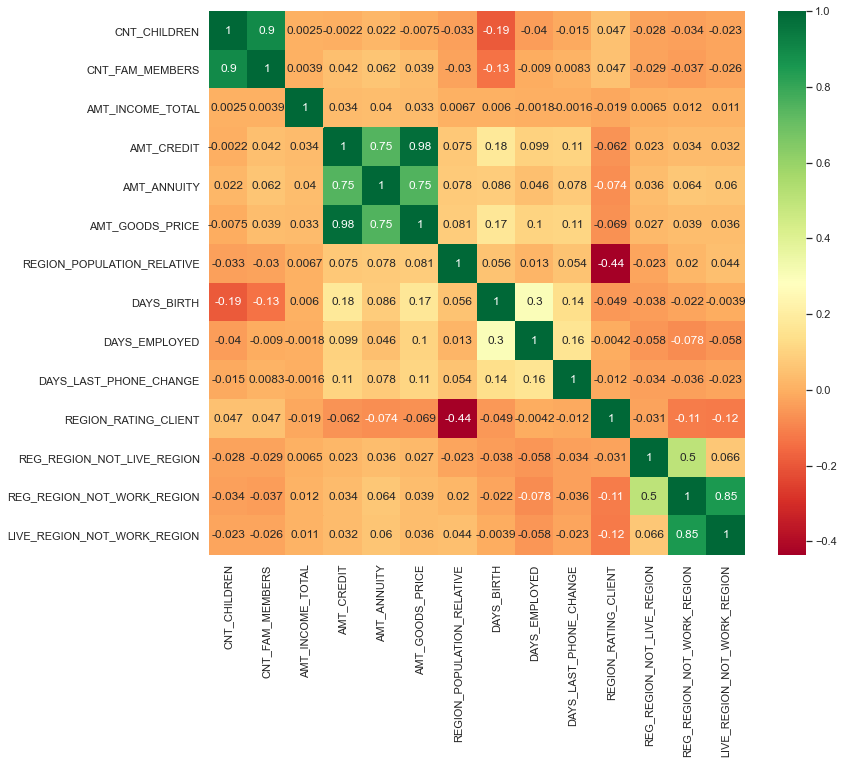

In [139]:
#Analysis of different numerical variables for Defaulters: Heatmap

plt.figure(figsize=[12,10])
sns.heatmap(Target_1[['CNT_CHILDREN', 'CNT_FAM_MEMBERS','AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 
                      'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                      'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'REG_REGION_NOT_LIVE_REGION',
                      'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION']].corr(), annot=True, 
            cmap="RdYlGn")
plt.show()

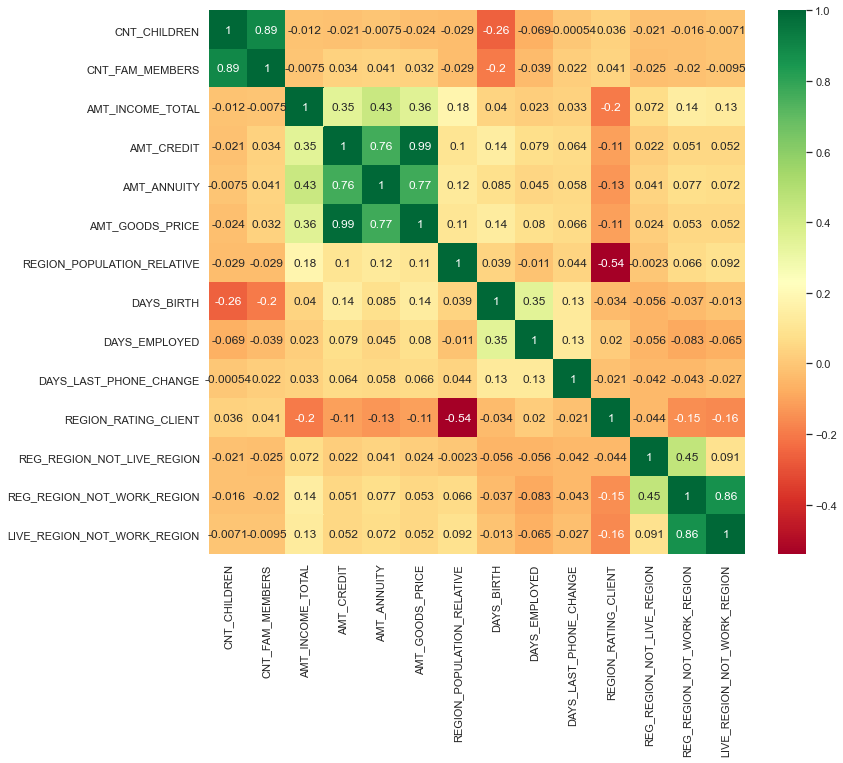

In [140]:
#Analysis of different numerical variables for Non-Defaulters: Heatmap

plt.figure(figsize=[12,10])
sns.heatmap(Target_0[['CNT_CHILDREN', 'CNT_FAM_MEMBERS','AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 
                      'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                      'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'REG_REGION_NOT_LIVE_REGION',
                      'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION']].corr(), annot=True, 
            cmap="RdYlGn")
plt.show()

From the above heatmap, we can observe :
- positive correaltion between Credit vs Annuity, Goods price, Income and vice-versa.
- negative correlation between Population of region where client lives vs rating of the region where client lives, Region Rating vs Credit, Annuity, Goods price, Income; Similar, observation seen for family size and number of children.
Also, can observe that if client's permanent address does not match contact address--then it doesn't match with work address either.

### Top 10 Correlation for client with payment difficulties

In [141]:
Correlation_1= Target_1[['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                         'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                         'REGION_RATING_CLIENT', 'REG_REGION_NOT_LIVE_REGION',
                         'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION']].corr(method='pearson')
Correlation_1.where(np.triu(np.ones(Correlation_1.shape),k=1).astype(np.bool))
Correlation_df=Correlation_1.unstack().reset_index()
Correlation_df.columns= ["Variable_1", "Variable_2", "Correlation"]
Correlation_df.dropna(subset=["Correlation"], inplace=True)
Correlation_df["Absolute Correlation"]=Correlation_df["Correlation"].abs()

In [142]:
Correlation_df= Correlation_df[Correlation_df["Absolute Correlation"]<1.0]

In [143]:
Correlation_df.sort_values("Absolute Correlation", ascending=False).head(10)

,Variable_1,Variable_2,Correlation,Absolute Correlation
34,AMT_GOODS_PRICE,AMT_CREDIT,0.982459,0.982459
14,AMT_CREDIT,AMT_GOODS_PRICE,0.982459,0.982459
119,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.851271,0.851271
109,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,0.851271,0.851271
35,AMT_GOODS_PRICE,AMT_ANNUITY,0.747711,0.747711
25,AMT_ANNUITY,AMT_GOODS_PRICE,0.747711,0.747711
23,AMT_ANNUITY,AMT_CREDIT,0.746656,0.746656
13,AMT_CREDIT,AMT_ANNUITY,0.746656,0.746656
107,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.503315,0.503315
97,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,0.503315,0.503315


### Analysis of previous application data

In [144]:
#read the data set of "previous_application.csv" in Prev_Applicant.
Prev_Applicant= pd.read_csv(r"C:\Users\deeks\Downloads\previous_application.csv")

#Print the head of Prev_Applicant(First 5 rows)
Prev_Applicant.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
#Print the tail of Prev_Applicant(last 5 rows)
Prev_Applicant.tail()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,NaN,360000.0,SUNDAY,10,...,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


'XNA'/'XAP' are present in the loaded dataframe which means NA.Hence, will replace these values with null

In [146]:
Prev_Applicant= Prev_Applicant.replace("XNA", np.NaN)
Prev_Applicant= Prev_Applicant.replace("XAP", np.NaN)

In [147]:
#print the information of variables to check their data types
Prev_Applicant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1669868 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [148]:
Prev_Applicant.shape

(1670214, 37)

In [149]:
#Checking missing values % columns

Missing_value7 = (Prev_Applicant.isnull().sum()/len(Prev_Applicant))*100
Missing_value7.sort_values(ascending=False).head(30)

RATE_INTEREST_PRIMARY         99.643698
RATE_INTEREST_PRIVILEGED      99.643698
NAME_CASH_LOAN_PURPOSE        95.830774
CODE_REJECT_REASON            81.327123
NAME_PRODUCT_TYPE             63.684414
NAME_GOODS_CATEGORY           56.927376
AMT_DOWN_PAYMENT              53.636480
RATE_DOWN_PAYMENT             53.636480
NAME_SELLER_INDUSTRY          51.234153
NAME_TYPE_SUITE               49.119754
NFLAG_INSURED_ON_APPROVAL     40.298129
DAYS_TERMINATION              40.298129
DAYS_LAST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION     40.298129
DAYS_FIRST_DUE                40.298129
DAYS_FIRST_DRAWING            40.298129
NAME_PAYMENT_TYPE             37.563091
NAME_YIELD_GROUP              30.966990
AMT_GOODS_PRICE               23.081773
AMT_ANNUITY                   22.286665
CNT_PAYMENT                   22.286366
NAME_PORTFOLIO                22.286366
NAME_CLIENT_TYPE               0.116213
NAME_CONTRACT_TYPE             0.020716
PRODUCT_COMBINATION            0.020716


In [150]:
#Dropping the coulmns having more than 99% of data missing; as it doesn't have sufficent data for analysis.

Missing_Cols= Prev_Applicant.columns[Prev_Applicant.isnull().mean()>0.99]

Prev_Applicant.drop(Missing_Cols, axis=1, inplace=True)

In [151]:
Prev_Applicant.shape

(1670214, 35)

For lesser % missing values, check data distrubtion % to drop those rows or to impute

In [152]:
#AMT_CREDIT

Prev_Applicant.AMT_CREDIT.describe().astype(int)

count    1670213
mean      196114
std       318574
min            0
25%        24160
50%        80541
75%       216418
max      6905160
Name: AMT_CREDIT, dtype: int32

In [153]:
#Looks like there are outliers in the data, as the difference between max value and 75% values is high. 
#So, will impute the missing value with Median.

Prev_Applicant.loc[Prev_Applicant.AMT_CREDIT.isnull(), "AMT_CREDIT"]= Prev_Applicant.AMT_CREDIT.median()

Prev_Applicant.AMT_CREDIT.isnull().sum()

0

In [154]:
#NAME_CONTRACT_TYPE

round(Prev_Applicant.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100,2) #Percent distribution 

Cash loans         44.77
Consumer loans     43.67
Revolving loans    11.57
Name: NAME_CONTRACT_TYPE, dtype: float64

In [155]:
#dropping NAME_CONTRACT_TYPE missing records

Prev_Applicant=Prev_Applicant[~Prev_Applicant.NAME_CONTRACT_TYPE.isnull()]
Prev_Applicant.NAME_CONTRACT_TYPE.isnull().sum()

0

In [156]:
#For PRODUCT_COMBINATION 

round(Prev_Applicant.PRODUCT_COMBINATION.value_counts(normalize=True)*100,2) #percent distribution

Cash                              17.13
POS household with interest       15.79
POS mobile with interest          13.21
Cash X-Sell: middle                8.62
Cash X-Sell: low                   7.80
Card Street                        6.74
POS industry with interest         5.92
POS household without interest     4.96
Card X-Sell                        4.83
Cash Street: high                  3.57
Cash X-Sell: high                  3.55
Cash Street: middle                2.08
Cash Street: low                   2.03
POS mobile without interest        1.44
POS other with interest            1.43
POS industry without interest      0.75
POS others without interest        0.15
Name: PRODUCT_COMBINATION, dtype: float64

In [157]:
#dropping NAME_CLIENT_TYPE missing records

Prev_Applicant=Prev_Applicant[~Prev_Applicant.PRODUCT_COMBINATION.isnull()]
Prev_Applicant.PRODUCT_COMBINATION.isnull().sum()

0

In [158]:
#NAME_CLIENT_TYPE 

round(Prev_Applicant.NAME_CLIENT_TYPE.value_counts(normalize=True)*100,2) #Percentage distribution

Repeater     73.80
New          18.07
Refreshed     8.13
Name: NAME_CLIENT_TYPE, dtype: float64

In [159]:
#dropping NAME_CLIENT_TYPE missing records

Prev_Applicant=Prev_Applicant[~Prev_Applicant.NAME_CLIENT_TYPE.isnull()]
Prev_Applicant.NAME_CLIENT_TYPE.isnull().sum()

0

In [160]:
Prev_Applicant.NAME_PORTFOLIO.value_counts() 

POS      690539
Cash     461238
Cards    144881
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

In [161]:
#'Cars' in portfolio appears to be an error, to be replaced with Cards
Prev_Applicant.loc[Prev_Applicant["NAME_PORTFOLIO"] =='Cars', "NAME_PORTFOLIO"]= "Cards"
Prev_Applicant.NAME_PORTFOLIO.value_counts() 

POS      690539
Cash     461238
Cards    145306
Name: NAME_PORTFOLIO, dtype: int64

### Univariant analysis on previous application data

#### Categorical data:

`1. NAME_CONTRACT_STATUS`

In [162]:
Prev_Applicant.NAME_CONTRACT_STATUS.unique()

array(['Approved', 'Refused', 'Canceled', 'Unused offer'], dtype=object)

In [163]:
#Previous Application Status

Contract_S= round(Prev_Applicant.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100,2) #percentage distribution
Contract_S_Names = Contract_S.index.tolist() #Extract Unquie names in Contract status


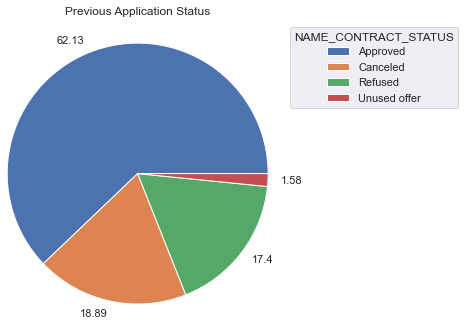

In [164]:
# calling defined function-- plot_pie 

plot_pie(y=Contract_S,title="Previous Application Status",legend= Contract_S_Names,
         col_name= "NAME_CONTRACT_STATUS")

We can observe majority of loan are approved for previous applicants.

`2. WEEKDAY_APPR_PROCESS_START`

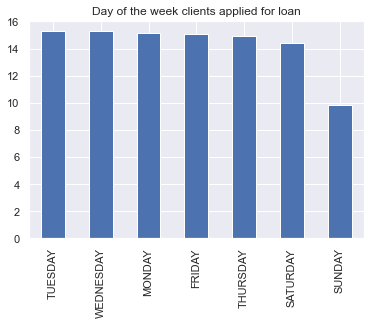

In [165]:
round(Prev_Applicant.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True)*100,2).plot.bar()
plt.title("Day of the week clients applied for loan")
plt.show()

We can observe lesser number of applicant on weekend/sunday.

`3. NAME_CLIENT_TYPE`

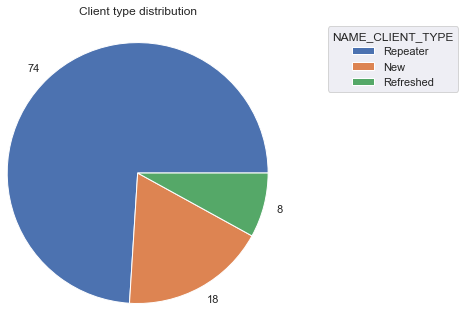

In [166]:
Client_T= round(Prev_Applicant.NAME_CLIENT_TYPE.value_counts(normalize=True)*100,0).astype(int) # percentage distribution
Client_T_name = Client_T.index.tolist() #extracts names of client type

plot_pie(Client_T,"Client type distribution",Client_T_name, "NAME_CLIENT_TYPE" )

We can observe majority of clients are Repeater and 18% are new clients.

`4. NAME_PAYMENT_TYPE`

In [167]:
def plot_pie(y,title,legend,col_name):
    plt.pie(y, labels= y, radius=1.6, explode=(0,0,0.2))
    plt.title(title, pad=50)
    plt.legend(legend,title=col_name ,bbox_to_anchor=(1.2,1))
    plt.show()

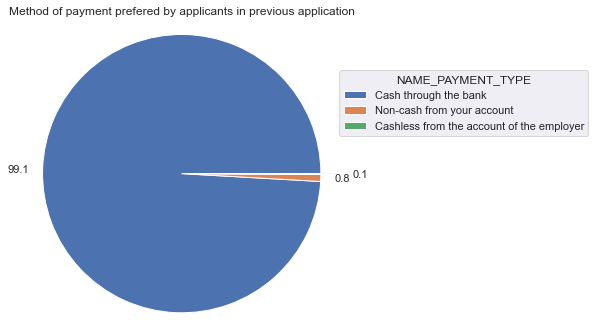

In [168]:
Payment_T= round(Prev_Applicant.NAME_PAYMENT_TYPE.value_counts(normalize=True)*100,1) #Percentage distribution
Payment_T_name= Payment_T.index.tolist() #extracts names of payment type

plot_pie(Payment_T, "Method of payment prefered by applicants in previous application", Payment_T_name, "NAME_PAYMENT_TYPE" )

We can observe that 99% clients preferred to pay cash through the bank.

`5. NAME_PORTFOLIO`

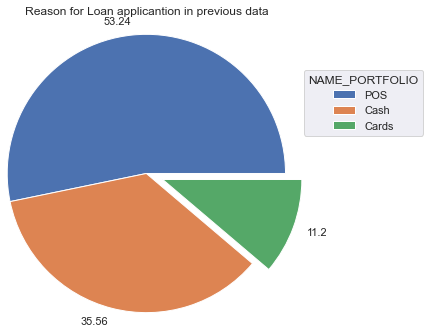

In [169]:
Portfolio = round(Prev_Applicant.NAME_PORTFOLIO.value_counts(normalize=True)*100,2) #Percentage distribution
Portfolio_name= Portfolio.index.tolist() #extracts names of payment type

plot_pie(Portfolio, "Reason for Loan applicantion in previous data", Portfolio_name, "NAME_PORTFOLIO" )

We can observe more than 50% of previous application is for POS and 35% is for cash.

`6. CODE_REJECT_REASON`

In [171]:
def plot_pie(y,title,legend,col_name):
    plt.pie(y, labels= y, radius=1.5)
    plt.title(title, pad=50)
    plt.legend(legend,title=col_name ,bbox_to_anchor=(1.2,1))
    plt.show()

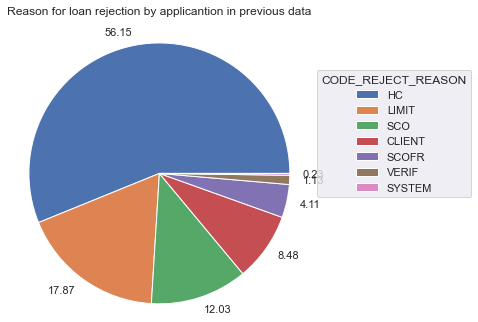

In [172]:
Reject_Reason = round(Prev_Applicant.CODE_REJECT_REASON.value_counts(normalize=True)*100,2) #Percentage distribution
Reject_Reason_name = Reject_Reason.index.tolist() #extracts names of payment type

plot_pie(Reject_Reason, "Reason for loan rejection by applicantion in previous data", Reject_Reason_name, "CODE_REJECT_REASON" )

We can observe that more than 50% of applicants have rejected the loan due to HC and 18% due to limit.

#### Numerical data:

`1. AMT_ANNUITY`

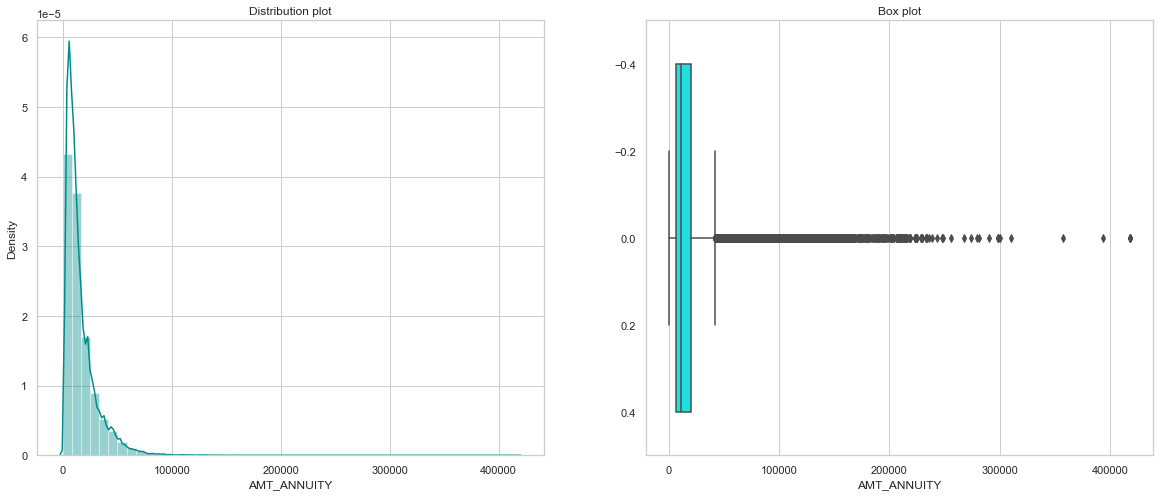

In [173]:
#calling defined function: plot_dist_bar 

plot_dis_bar(Prev_Applicant, "AMT_ANNUITY")

We can observe some outliers and non-normal distribution for AMT_ANNUITY data in previous application. Outliers are present in clients annuity and Q1 is smaller than Q3 for annuity distribution.

`2. AMT_CREDIT`

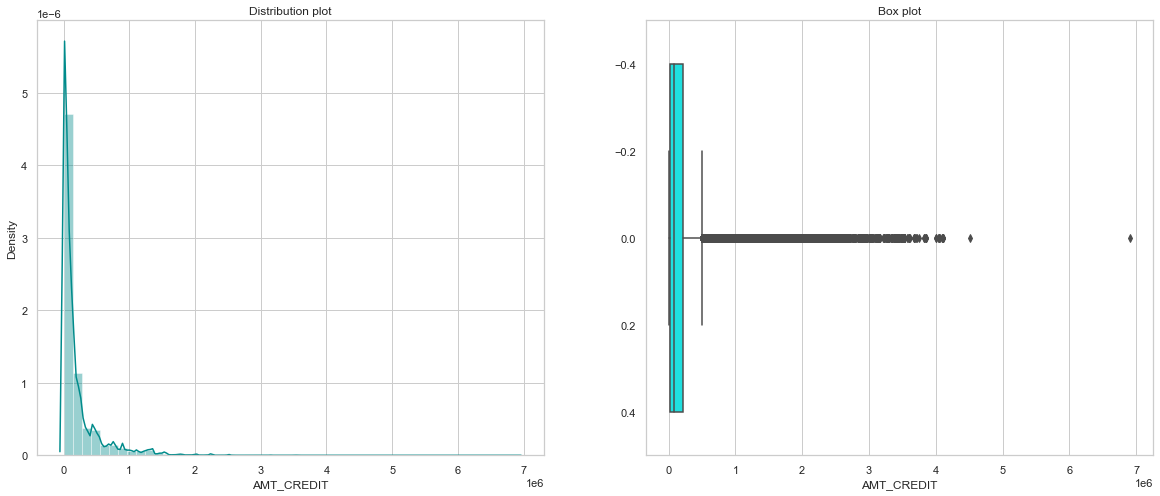

In [174]:
plot_dis_bar(Prev_Applicant, "AMT_CREDIT")

We can observe some outliers and non-normal distribution for AMT_CREDIT data in previous application. There are some outliers and Q1 is almost overlapping with lower fence and it's smaller than Q3 for credit distribution.

`3. AMT_GOODS_PRICE`

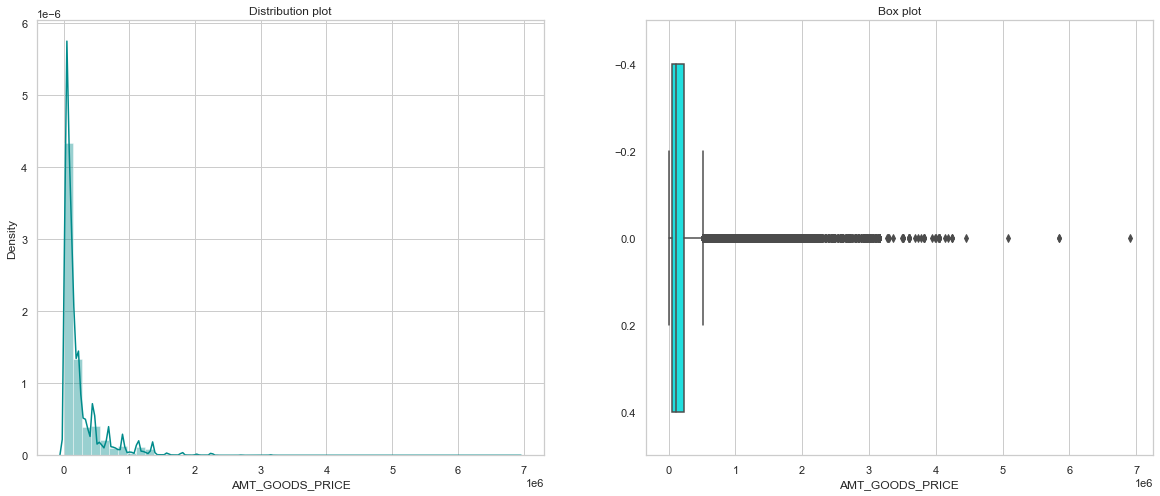

In [175]:
plot_dis_bar(Prev_Applicant, "AMT_GOODS_PRICE")

We can observe some outliers and non-normal distribution for AMT_GOODS_PRICE data in previous application. There are some outliers and Q1 is almost overlapping with lower fence and it's smaller than Q3 for Goods price distribution.

### Merging Target data from New_applicant with Prev_applicant for Analysis

In [176]:
New_Applicant.columns[0]

'SK_ID_CURR'

In [177]:
Prev_Applicant.columns[1]

'SK_ID_CURR'

In [178]:
#creating dataframe containing only 'TARGET' and 'SK_ID_CURR' columns from New_Applicant.

New_Applicant_MCol = New_Applicant[["SK_ID_CURR", 'TARGET']]
New_Applicant_MCol.head()

,SK_ID_CURR,TARGET
0,100002,1
1,100003,0
2,100004,0
4,100007,0
5,100008,0


In [179]:
#Merging 'TARGET' column from New_applicant with common column 'SK_ID_CURR'

Merged_Applicant = New_Applicant_MCol.merge(Prev_Applicant, on="SK_ID_CURR", how="inner")
Merged_Applicant.head()

,SK_ID_CURR,TARGET,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,...,NaN,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,2396755,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,1564014,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [180]:
Merged_Applicant.shape

(1002974, 36)

In [181]:
Merged_Applicant.columns

Index(['SK_ID_CURR', 'TARGET', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE',
       'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [182]:
#Dividing the Merged_Applicant dataset into 2 set based on values in Taget column: Target_1(Defaulter) and Target_0(Non-Defaulter)

Merged_Applicant_1 = Merged_Applicant[Merged_Applicant.TARGET==1] #Defaulter
Merged_Applicant_0 = Merged_Applicant[Merged_Applicant.TARGET==0] #Non-Defaulter

#Percentage of data distribution in New_Applicant dataset.
Merged_Applicant_1_Per= round((len(Merged_Applicant_1)/len(Merged_Applicant.TARGET))*100,2)
Merged_Applicant_0_Per= round((len(Merged_Applicant_0)/len(Merged_Applicant.TARGET))*100,2)

print("Defaulter % in Merge_Applicant dataset =", Merged_Applicant_1_Per,"%")
print("Non-Defaulter % in Merge_Applicant dataset =",Merged_Applicant_0_Per,"%" )

Defaulter % in Merge_Applicant dataset = 9.03 %
Non-Defaulter % in Merge_Applicant dataset = 90.97 %


### Analysis of Merged applicant data

##### Univariate analysis

In [183]:
#defining function to subplot for further analysis

def sub_plot(df1,df0,col_name):
    plt.figure(figsize=[12,5])
    plt.subplot(1,2,1)
    df1[col_name].value_counts(normalize=True).plot.bar()
    plt.title( "% of Defaulters within each category")
    plt.subplot(1,2,2)
    df0[col_name].value_counts(normalize=True).plot.bar()
    plt.title( "% of Non-Defaulters within each category")
    plt.show()

1. Distribution applicants in each category of "Contract Status" :  

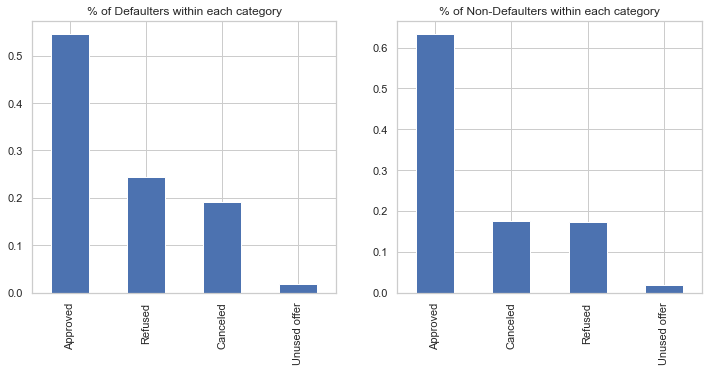

In [184]:
sub_plot(Merged_Applicant_1, Merged_Applicant_0, "NAME_CONTRACT_STATUS")

From the above graph we can observe that percentage of defaulter are more with clients who had previously refused the loan.

2. Distribution applicants in each category of "Contract type"

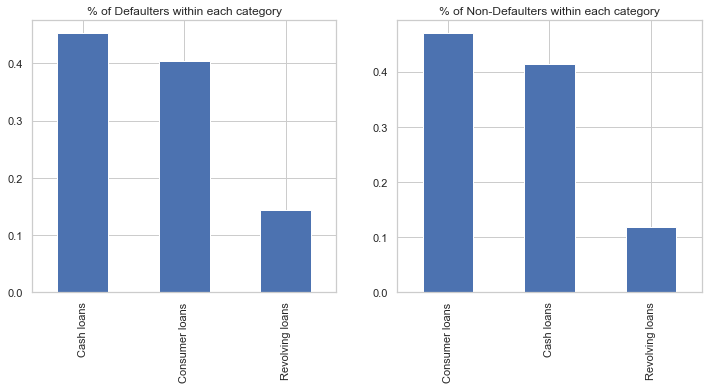

In [185]:
sub_plot(Merged_Applicant_1, Merged_Applicant_0, "NAME_CONTRACT_TYPE")

From the above graph we can observe that percentage of defaulter are more with Cash loan. Also, there is decrease % in defaulters who had consumer loan type and increased % of defaulters who had revolving loan. 

##### Bivariate analysis

In [186]:
#Defining countplot function for further analysis

def count_plot(df,col_name_1, hue,title):
    sns.set_style('whitegrid')
    plt.figure(figsize=(10,10))
    plt.xticks(rotation=90)
    plt.xscale('log')
    plt.title(title)
    sns.countplot(data = df, y= col_name_1, 
                   order=df[col_name_1].value_counts().index, hue = hue)
    plt.show()

`1. NAME_CASH_LOAN_PURPOSE vs NAME_CONTRACT_STATUS`

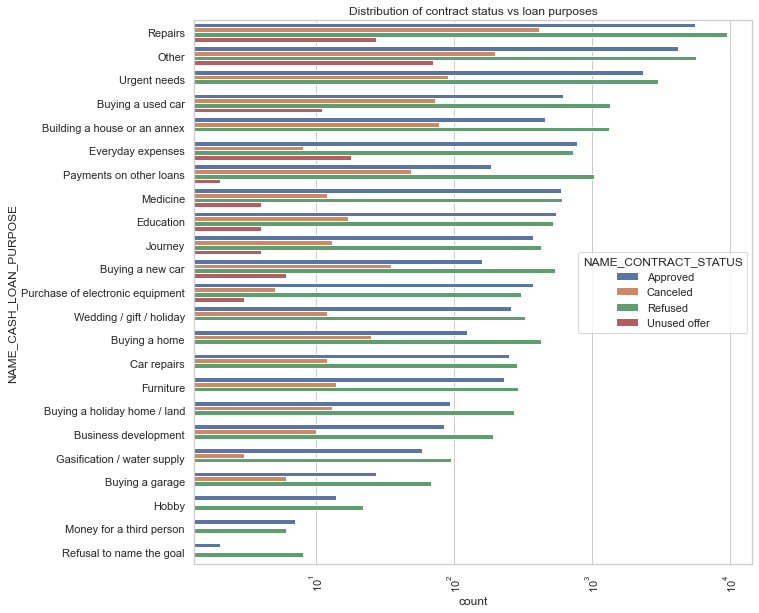

In [187]:
count_plot(Merged_Applicant,'NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','Distribution of contract status vs loan purposes')

From the above graph, we can observe that most of loans are rejected for repair purpose than approved. For 'Buying house/home', Urgent needs', 'weddings', 'Car repair'- there are no unused offer for these category but there is higher rate of refusal than approval.

`2. 'NAME_CASH_LOAN_PURPOSE' vs'TARGET'`

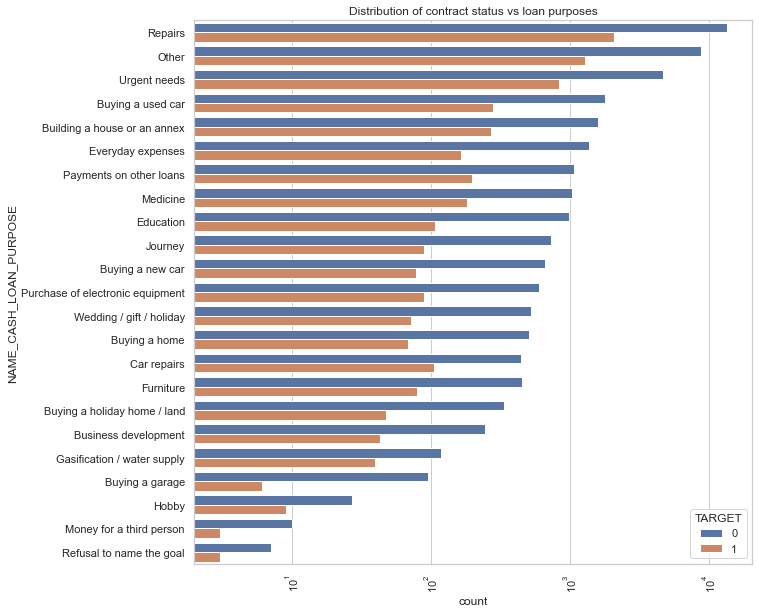

In [188]:
count_plot(Merged_Applicant,'NAME_CASH_LOAN_PURPOSE','TARGET','Distribution of contract status vs loan purposes')

From the above graph, we can observe that:
- Loans taken for 'Repair' purpose has more defaulters.
- Loans taken for 'Buying garage' has less defaulters. 


`3. Defaulter Client type vs Contract status`

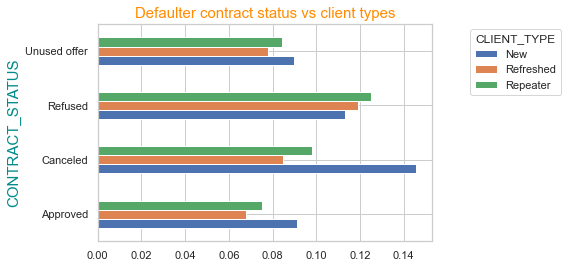

In [189]:
pd.pivot_table(Merged_Applicant, values='TARGET', index=["NAME_CLIENT_TYPE"], 
               columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean).T.plot(kind='barh')
plt.ylabel("CONTRACT_STATUS", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'darkcyan'})
plt.title("Defaulter contract status vs client types", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'darkorange'} )
plt.legend(title= "CLIENT_TYPE",bbox_to_anchor=(1.4,1))
plt.show()

From the above graph, we can observe that more defaulters are from new clients who had previously canceled the loan. 

`4. Defaulter Contract type vs Contract status`

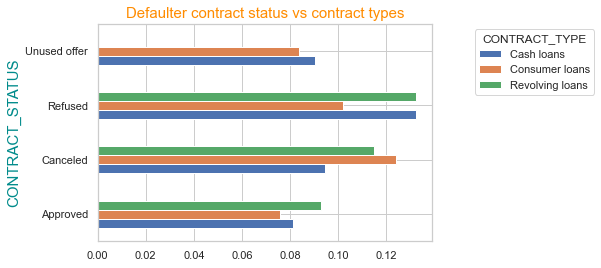

In [190]:
pd.pivot_table(Merged_Applicant, values='TARGET', index=["NAME_CONTRACT_TYPE"], 
               columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean).T.plot(kind='barh')
plt.ylabel("CONTRACT_STATUS", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'darkcyan'})
plt.title("Defaulter contract status vs contract types", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'darkorange'} )
plt.legend(title= "CONTRACT_TYPE",bbox_to_anchor=(1.5,1))
plt.show()

From the above graph, we can observe that clients with 'Cash loan' / 'Revolving loans' who has previously refused loan tend be on the higher defaulter side.

5. Defaulter Payment type vs Contract status

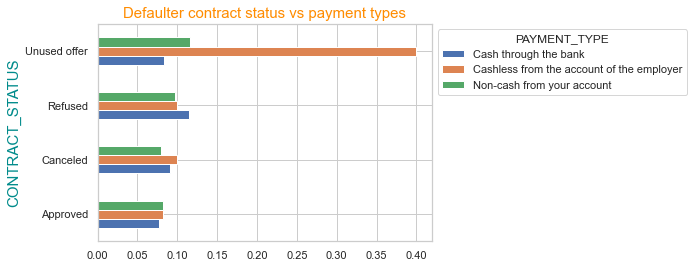

In [191]:
pd.pivot_table(Merged_Applicant, values='TARGET', index=["NAME_PAYMENT_TYPE"], 
               columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean).T.plot(kind='barh')
plt.ylabel("CONTRACT_STATUS", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'darkcyan'})
plt.title("Defaulter contract status vs payment types", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'darkorange'} )
plt.legend(title= "PAYMENT_TYPE",bbox_to_anchor=(1,1))
plt.show()

From the above graph, we can observe that clients who chose 'Cashless from the account of employer' who has previously unused loan offer appears to be the defaulter on higher side. Less defaulters is seen with clients who chose 'Non-cash payment from account'. 